## Wilson Phillips
## 201418075

# Imports

In [207]:
import pandas as pd
import numpy as np
import matplotlib as plt
from collections import Counter

# Importing the dataset

In [208]:
df = pd.read_excel(r'Compact_arbo_comp_data.xlsx', na_values=['NA', 'None', 'none', '', 'ND', 'NT', 'NaN', 'nan', 'NAN'], sheet_name='compact_data')
df.drop(index=[12002, 12003, 12004, 12005, 12006, 12007],axis=0, inplace=True) #notes said 'not usable'


df['perc.trans.infected'] = pd.to_numeric(df['perc.trans.infected'], errors = 'coerce') #changes rows with strings in perc.trans.infected to NaN as there were some issues later on

In [209]:
#dataset containing virus data merging with original df
virus_df = pd.read_csv('virus_data.csv')
virus_df_specific = virus_df[['virus.data.id', 'segments', 'gc_content', 'length', 'ORF_length', 'hydrophobicity', 'charge']]
df_merged = pd.merge(df, virus_df_specific, how='inner', on='virus.data.id')

#dataset containing mosquito data merging with df_merged
mosquito_df = pd.read_csv('wilson_mosquito_data.csv')
mosquito_df.drop(['mos.species', 'location.id'], axis=1, inplace=True)
df_merged_2 = pd.merge(df_merged, mosquito_df, how='inner', on='id')

#dataset containing mosquito food data merging with df_merged_2
mosquito_food_df = pd.read_excel('mosquito_feeding.xlsx')
mosquito_food_df.drop(['source'], axis=1, inplace=True)
df_merged_final = pd.merge(df_merged_2, mosquito_food_df, how='inner', on='mos.species')

df_merged_final

,id,study,PMID,Title,DOI,year,virus.class,virus,virusTaxID,strain.mapped,...,cv_pre,cv_temp_mean,cv_temp_min,cv_wet,NPP,NPP_trend,amp_prop,ave_prop,mam_prop,rep_prop
0,2,2,37919794,Comparative analysis of the susceptibility of ...,10.1186/s41182-023-00553-5,2023,Orthoflavivirus,Dengue virus 1,11053,D1/Hu/Saitama/NIID100/2014,...,0.040777,0.585994,0.492061,-0.283557,140.843504,27.562500,0.000000,0.015480,0.984520,0.000000
1,3,2,37919794,Comparative analysis of the susceptibility of ...,10.1186/s41182-023-00553-5,2023,Orthoflavivirus,Dengue virus 2,11060,D2/Hu/India/NIID74/2009,...,0.040777,0.585994,0.492061,-0.283557,140.843504,27.562500,0.000000,0.015480,0.984520,0.000000
2,4,2,37919794,Comparative analysis of the susceptibility of ...,10.1186/s41182-023-00553-5,2023,Orthoflavivirus,Dengue virus 3,11069,00-40-1HuNIID,...,0.040777,0.585994,0.492061,-0.283557,140.843504,27.562500,0.000000,0.015480,0.984520,0.000000
3,5,2,37919794,Comparative analysis of the susceptibility of ...,10.1186/s41182-023-00553-5,2023,Orthoflavivirus,Dengue virus 4,11070,D4/Hu/Marshall Islands/NIID30/2012,...,0.040777,0.585994,0.492061,-0.283557,140.843504,27.562500,0.000000,0.015480,0.984520,0.000000
4,31,5,37669272,Jamestown Canyon virus is transmissible by Aed...,10.1371/journal.pntd.0011616,2023,Orthobunyavirus,Jamestown Canyon virus,35511,CT 15-8-72591,...,0.556925,1.956842,1.130102,0.330626,158.070652,-12.000000,0.000000,0.015480,0.984520,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14015,12792,466,29383746,Vector competence of Culex antennatus and Anop...,10.1111/mve.12291,2018,Phlebovirus,Rift Valley fever virus,11588,isolated from an RVFV-infected pool of mosquit...,...,0.206822,0.069979,0.080078,-0.219328,216.442489,1.590887,0.004695,0.015258,0.980047,0.000000
14016,13558,542,31882976,Low vector competence in sylvatic mosquitoes l...,10.1038/s41598-019-56669-4,2019,Orthoflavivirus,Zika virus,64320,Rio-U1,...,0.302421,0.770277,0.627009,1.655574,227.417391,4.200000,0.000000,0.000000,1.000000,0.000000
14017,13545,542,31882976,Low vector competence in sylvatic mosquitoes l...,10.1038/s41598-019-56669-4,2019,Orthoflavivirus,Zika virus,64320,Rio-S1,...,0.302421,0.770277,0.627009,1.655574,227.417391,4.200000,0.000000,0.000000,1.000000,0.000000
14018,13620,550,32722771,Culex interfor and Culex saltanensis (Diptera:...,10.1093/trstmh/traa058,2020,Orthoflavivirus,Saint Louis encephalitis virus,11080,CbaAr-4005,...,1.523778,0.902621,0.942930,1.935220,170.152174,-11.250000,0.001549,0.302521,0.601472,0.094458


In [210]:
'''
The amount of missing data is displayed here for each feature to help decide on feature selection
'''

missing_percentage_df = df_merged_final.isnull().mean()*100 #proportion of null (1) and available (0) values mean creates a percentage of null values
missing_percentage_df_arranged = missing_percentage_df.sort_values(ascending=False)
with pd.option_context('display.max_rows', None): #ensures all values are displayed by removing the limit on displaying rows
    print(missing_percentage_df_arranged)

wolbachia                        97.746077
mos.origin.admin3                87.196862
perc.trans.diss                  72.874465
accession number                 72.574893
perc.trans.infected              67.995720
notes                            63.637660
num.trans                        60.000000
total.trans                      59.443652
perc.trans                       57.047076
percent.dissem.Infected          55.149786
trans.assay.base                 52.703281
trans.method.original            52.310984
trans.method                     52.225392
mos.gen                          39.222539
num.dissem                       38.587732
total.dissem                     37.974322
num.infected                     35.699001
total.infected                   34.522111
mos.origin.admin2                34.293866
blood.proccessed                 33.459344
percent.dissem                   32.168331
dissemination.assay.base         30.413695
diss.to                          27.888730
percent.inf

In [211]:
#obtaining the percentage of instances spread over the realms
realms = df_merged['Realm']
realms = realms.value_counts(normalize=True)*100
print(realms)

Realm
Nearctic                  25.144406
Neotropical               17.314412
Palaearctic               13.021465
Indo-Malay                12.736219
Australasia               12.415318
Afrotropics                9.969336
Oceania                    5.697782
Colony                     3.693931
Indo-Malay;Palaearctic     0.007131
Name: proportion, dtype: float64


In [ ]:
'''
Infection dataframe drops unnecessary features for the study of the virus infecting the mosquitos

Some are explained with other features, some are features important in the dissemination/transmission 
datasets but not for the infection dataset, some have too much missing data.
'''


df_infect = df_merged_final.drop(['Title', 'id', 'study', 'PMID', 'DOI', 'accession number', 'notes', 'wolbachia', 
        'mos.origin.admin3', 'mos.gen', 'mos.origin.admin2', 'mos.origin.admin1', 'mos.taxid', 'mos.origin.country', 'mos.origin.exact', 'mos.pop.class', 'mos.colony', #mosquito data
        'infectious.dose.ready','unit.ready', 'infectious dose', 'unit', 'temp - C', 'day.PE', 'virus.culture.last.vertebrate', 'infection.method.original', #all explained with other feature
        'virusTaxID', 'strain.mapped', 'mosquito.pop',
        'day.PE.D', 'dissemination.assay.base', 'diss.to', #dissem features
        'dat.PE.T', 'trans.method.original', 'trans.method', 'trans.assay.base', #transmission features
        'virus.id', 'virus.data.id', 'location.id', #ids
        'virus.culture.original',
        'total.infected', 'num.infected', 'total.dissem', 'num.dissem', #target variables
        'percent.dissem', 'percent.dissem.Infected', 'total.trans',
        'num.trans', 'perc.trans', 'perc.trans.infected', 'perc.trans.diss'], axis=1).copy()

In [213]:
df_infect_dropped = df_infect.dropna().copy()
df_infect_dropped

,year,virus.class,virus,Realm,mos.species,mos.infection.method,blood.fed,blood.simplified,blood.proccessed,virus.culture.last,...,cv_pre,cv_temp_mean,cv_temp_min,cv_wet,NPP,NPP_trend,amp_prop,ave_prop,mam_prop,rep_prop
0,2023,Orthoflavivirus,Dengue virus 1,Indo-Malay,Aedes aegypti,membrane,rabbit,rabbit,defibrinated,vero,...,0.040777,0.585994,0.492061,-0.283557,140.843504,27.562500,0.0,0.015480,0.984520,0.0
1,2023,Orthoflavivirus,Dengue virus 2,Indo-Malay,Aedes aegypti,membrane,rabbit,rabbit,defibrinated,vero,...,0.040777,0.585994,0.492061,-0.283557,140.843504,27.562500,0.0,0.015480,0.984520,0.0
2,2023,Orthoflavivirus,Dengue virus 3,Indo-Malay,Aedes aegypti,membrane,rabbit,rabbit,defibrinated,vero,...,0.040777,0.585994,0.492061,-0.283557,140.843504,27.562500,0.0,0.015480,0.984520,0.0
3,2023,Orthoflavivirus,Dengue virus 4,Indo-Malay,Aedes aegypti,membrane,rabbit,rabbit,defibrinated,vero,...,0.040777,0.585994,0.492061,-0.283557,140.843504,27.562500,0.0,0.015480,0.984520,0.0
40,2018,Alphavirus,Mayaro Virus,Neotropical,Aedes aegypti,membrane,bovine,bovine,defibrinated,vero,...,0.564064,1.614723,1.712578,0.490704,162.584190,15.981818,0.0,0.015480,0.984520,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13963,2005,Alphavirus,Venezuelan equine encephalitis virus,Neotropical,Psorophora confinnis,membrane,sheep and FBS,sheep,erythrocytes,BHK-21,...,0.227701,0.093572,0.167811,-0.002364,220.971014,-2.666667,0.0,0.067358,0.932642,0.0
14008,2019,Orthoflavivirus,Dengue virus 1,Afrotropics,Aedes taylori,membrane,sheep,sheep,washed,C6/36,...,-0.573907,0.383096,0.534227,-0.247724,87.253397,12.852459,0.0,0.083333,0.916667,0.0
14009,2019,Orthoflavivirus,Dengue virus 3,Afrotropics,Aedes taylori,membrane,sheep,sheep,washed,C6/36,...,-0.573907,0.383096,0.534227,-0.247724,87.253397,12.852459,0.0,0.083333,0.916667,0.0
14010,2019,Orthoflavivirus,Dengue virus 4,Afrotropics,Aedes taylori,membrane,sheep,sheep,washed,C6/36,...,-0.573907,0.383096,0.534227,-0.247724,87.253397,12.852459,0.0,0.083333,0.916667,0.0


In [214]:
#Showing missing data included in the infection dataframe

null_infect = pd.isnull(df_infect)
missing_values_infect = null_infect.sum()
missing_percentage_infect = df_infect.isnull().mean()*100
missing_percentage_infect_arranged = missing_percentage_infect.sort_values(ascending=False)
with pd.option_context('display.max_rows', None):
    print(missing_percentage_infect_arranged)

blood.proccessed             33.459344
percent.infected             27.425107
infection.to                 24.614836
infec.assay.base             24.493581
blood.fed                    10.748930
blood.simplified             10.748930
mos.infection.method          7.097004
infectious.dose.level         4.486448
grassland                     3.687589
snow                          3.687589
shrubs                        3.687589
moss                          3.687589
mangroves                     3.687589
BIO12                         3.687589
cropland                      3.687589
built                         3.687589
water                         3.687589
bare                          3.687589
BIO19                         3.687589
BIO18                         3.687589
BIO17                         3.687589
BIO16                         3.687589
trees                         3.687589
pop05                         3.687589
wetlands                      3.687589
pop                      

## Dissemination

In [ ]:
'''
Dissemination dataframe drops unnecessary features for the study of the virus disseminating in the mosquitos

Some are explained with other features, some are features important in the infection/transmission 
dataframes but not for the dissemination dataframe, some have too much missing data.
'''

df_dissem = df_merged_final.drop(['Title', 'id', 'study', 'PMID', 'DOI', 'accession number', 'notes', 'wolbachia', 
        'mos.origin.admin3', 'mos.gen', 'mos.origin.admin2', 'mos.origin.admin1', 'mos.taxid', 'mos.origin.country', 'mos.origin.exact', 'mos.pop.class', 'mos.colony', #mosquito data
        'infectious.dose.ready','unit.ready', 'infectious dose', 'unit', 'temp - C', 'day.PE', 'virus.culture.last.vertebrate', #all explained with other feature
        'infection.method.original', 'day.PE.I', #specifically for infection
        'virusTaxID', 'strain.mapped', 'mosquito.pop',
        'dat.PE.T', 'trans.method.original', 'trans.method', 'trans.assay.base', #transmission features
        'virus.id', 'virus.data.id', 'location.id', #ids
        'virus.culture.original',
        'total.infected', 'num.infected', 'total.dissem', 'num.dissem', #target variables
        'percent.dissem', 'percent.infected', 'total.trans',
        'num.trans', 'perc.trans', 'perc.trans.infected', 'perc.trans.diss'], axis=1)

In [216]:
df_dissem_dropped = df_dissem.dropna()
df_dissem_dropped

,year,virus.class,virus,Realm,mos.species,mos.infection.method,blood.fed,blood.simplified,blood.proccessed,virus.culture.last,...,cv_pre,cv_temp_mean,cv_temp_min,cv_wet,NPP,NPP_trend,amp_prop,ave_prop,mam_prop,rep_prop
0,2023,Orthoflavivirus,Dengue virus 1,Indo-Malay,Aedes aegypti,membrane,rabbit,rabbit,defibrinated,vero,...,0.040777,0.585994,0.492061,-0.283557,140.843504,27.562500,0.0,0.015480,0.984520,0.0
1,2023,Orthoflavivirus,Dengue virus 2,Indo-Malay,Aedes aegypti,membrane,rabbit,rabbit,defibrinated,vero,...,0.040777,0.585994,0.492061,-0.283557,140.843504,27.562500,0.0,0.015480,0.984520,0.0
2,2023,Orthoflavivirus,Dengue virus 3,Indo-Malay,Aedes aegypti,membrane,rabbit,rabbit,defibrinated,vero,...,0.040777,0.585994,0.492061,-0.283557,140.843504,27.562500,0.0,0.015480,0.984520,0.0
3,2023,Orthoflavivirus,Dengue virus 4,Indo-Malay,Aedes aegypti,membrane,rabbit,rabbit,defibrinated,vero,...,0.040777,0.585994,0.492061,-0.283557,140.843504,27.562500,0.0,0.015480,0.984520,0.0
40,2018,Alphavirus,Mayaro Virus,Neotropical,Aedes aegypti,membrane,bovine,bovine,defibrinated,vero,...,0.564064,1.614723,1.712578,0.490704,162.584190,15.981818,0.0,0.015480,0.984520,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13963,2005,Alphavirus,Venezuelan equine encephalitis virus,Neotropical,Psorophora confinnis,membrane,sheep and FBS,sheep,erythrocytes,BHK-21,...,0.227701,0.093572,0.167811,-0.002364,220.971014,-2.666667,0.0,0.067358,0.932642,0.0
14008,2019,Orthoflavivirus,Dengue virus 1,Afrotropics,Aedes taylori,membrane,sheep,sheep,washed,C6/36,...,-0.573907,0.383096,0.534227,-0.247724,87.253397,12.852459,0.0,0.083333,0.916667,0.0
14009,2019,Orthoflavivirus,Dengue virus 3,Afrotropics,Aedes taylori,membrane,sheep,sheep,washed,C6/36,...,-0.573907,0.383096,0.534227,-0.247724,87.253397,12.852459,0.0,0.083333,0.916667,0.0
14010,2019,Orthoflavivirus,Dengue virus 4,Afrotropics,Aedes taylori,membrane,sheep,sheep,washed,C6/36,...,-0.573907,0.383096,0.534227,-0.247724,87.253397,12.852459,0.0,0.083333,0.916667,0.0


In [217]:
#Showing missing data included in the dissemination dataframe

null_dissem = pd.isnull(df_dissem)
missing_values_dissem = null_dissem.sum()
missing_percentage_dissem = df_dissem.isnull().mean()*100
missing_percentage_dissem_arranged = missing_percentage_dissem.sort_values(ascending=False)
with pd.option_context('display.max_rows', None):
    print(missing_percentage_dissem_arranged)

percent.dissem.Infected      55.149786
blood.proccessed             33.459344
dissemination.assay.base     30.413695
diss.to                      27.888730
infection.to                 24.614836
infec.assay.base             24.493581
blood.fed                    10.748930
blood.simplified             10.748930
mos.infection.method          7.097004
infectious.dose.level         4.486448
BIO11                         3.687589
snow                          3.687589
shrubs                        3.687589
moss                          3.687589
mangroves                     3.687589
built                         3.687589
grassland                     3.687589
cropland                      3.687589
water                         3.687589
bare                          3.687589
BIO19                         3.687589
BIO18                         3.687589
BIO17                         3.687589
BIO16                         3.687589
trees                         3.687589
pop10                    

## Transmission

In [ ]:
'''
Transmission dataframe drops unnecessary features for the study of the virus transmitting from the mosquitos to a host

Some are explained with other features, some are features important in the infection/dissemination 
dataframes but not for the transmission dataframe, some have too much missing data.
'''

df_trans = df_merged_final.drop(['Title', 'id', 'study', 'PMID', 'DOI', 'accession number', 'notes', 'wolbachia',
        'mos.origin.admin3', 'mos.gen', 'mos.origin.admin2', 'mos.origin.admin1', 'mos.taxid', 'mos.origin.country', 'mos.origin.exact', 'mos.pop.class', 'mos.colony', #mosquito data
        'infectious.dose.ready','unit.ready', 'infectious dose', 'unit', 'temp - C', 'day.PE', 'virus.culture.last.vertebrate', 'trans.method.original', #all explained with other feature
        'infection.method.original', 'infection.to', 'day.PE.I', #specifically for infection
        'dissemination.assay.base', 'diss.to', 'day.PE.D', #specifically for dissem
        'virusTaxID', 'strain.mapped', 'mosquito.pop',
        'virus.id', 'virus.data.id', 'location.id', #ids
        'virus.culture.original',
        'total.infected', 'num.infected', 'total.dissem', 'num.dissem', #target variables
        'percent.dissem', 'percent.infected', 'total.trans',
        'num.trans', 'perc.trans', 'percent.dissem.Infected', 'perc.trans.diss'], axis=1)

In [219]:
df_trans_dropped = df_trans.dropna()
df_trans_dropped


,year,virus.class,virus,Realm,mos.species,mos.infection.method,blood.fed,blood.simplified,blood.proccessed,virus.culture.last,...,cv_pre,cv_temp_mean,cv_temp_min,cv_wet,NPP,NPP_trend,amp_prop,ave_prop,mam_prop,rep_prop
40,2018,Alphavirus,Mayaro Virus,Neotropical,Aedes aegypti,membrane,bovine,bovine,defibrinated,vero,...,0.564064,1.614723,1.712578,0.490704,162.584190,15.981818,0.0,0.015480,0.984520,0.0
41,2018,Alphavirus,Mayaro Virus,Neotropical,Aedes aegypti,membrane,bovine,bovine,defibrinated,vero,...,0.564064,1.614723,1.712578,0.490704,162.584190,15.981818,0.0,0.015480,0.984520,0.0
42,2018,Alphavirus,Mayaro Virus,Neotropical,Aedes aegypti,membrane,bovine,bovine,defibrinated,vero,...,0.564064,1.614723,1.712578,0.490704,162.584190,15.981818,0.0,0.015480,0.984520,0.0
43,2018,Alphavirus,Mayaro Virus,Neotropical,Aedes aegypti,membrane,bovine,bovine,defibrinated,vero,...,0.564064,1.614723,1.712578,0.490704,162.584190,15.981818,0.0,0.015480,0.984520,0.0
189,2023,Alphavirus,Mayaro Virus,Neotropical,Aedes aegypti,membrane,sheep,sheep,defibrinated,vero,...,-0.041070,0.295325,0.229994,-0.003573,199.473430,16.666667,0.0,0.015480,0.984520,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13963,2005,Alphavirus,Venezuelan equine encephalitis virus,Neotropical,Psorophora confinnis,membrane,sheep and FBS,sheep,erythrocytes,BHK-21,...,0.227701,0.093572,0.167811,-0.002364,220.971014,-2.666667,0.0,0.067358,0.932642,0.0
14008,2019,Orthoflavivirus,Dengue virus 1,Afrotropics,Aedes taylori,membrane,sheep,sheep,washed,C6/36,...,-0.573907,0.383096,0.534227,-0.247724,87.253397,12.852459,0.0,0.083333,0.916667,0.0
14009,2019,Orthoflavivirus,Dengue virus 3,Afrotropics,Aedes taylori,membrane,sheep,sheep,washed,C6/36,...,-0.573907,0.383096,0.534227,-0.247724,87.253397,12.852459,0.0,0.083333,0.916667,0.0
14010,2019,Orthoflavivirus,Dengue virus 4,Afrotropics,Aedes taylori,membrane,sheep,sheep,washed,C6/36,...,-0.573907,0.383096,0.534227,-0.247724,87.253397,12.852459,0.0,0.083333,0.916667,0.0


In [220]:
#Showing missing data included in the transmission dataframe

null_trans = pd.isnull(df_trans)
missing_values_trans = null_trans.sum()
missing_percentage_trans = df_trans.isnull().mean()*100
missing_percentage_trans_arranged = missing_percentage_trans.sort_values(ascending=False)
with pd.option_context('display.max_rows', None):
    print(missing_percentage_trans_arranged)

perc.trans.infected          67.995720
trans.assay.base             52.703281
trans.method                 52.225392
blood.proccessed             33.459344
infec.assay.base             24.493581
blood.fed                    10.748930
blood.simplified             10.748930
mos.infection.method          7.097004
infectious.dose.level         4.486448
BIO12                         3.687589
snow                          3.687589
shrubs                        3.687589
moss                          3.687589
mangroves                     3.687589
built                         3.687589
grassland                     3.687589
cropland                      3.687589
water                         3.687589
bare                          3.687589
BIO19                         3.687589
BIO18                         3.687589
BIO17                         3.687589
BIO16                         3.687589
trees                         3.687589
pop10                         3.687589
wetlands                 

## Feature engineering of the target variable

In [420]:

target_infect = df_infect_dropped['percent.infected']
target_dissem = df_dissem_dropped['percent.dissem.Infected']
target_trans = df_trans_dropped['perc.trans.infected']

"""
Defining a threshold, with those with 0% being labelled as 0, those with 1-49& being 
labelled as 1 and those 50-100% being labelled as 2.
This allows for 3 levels of competence- not competent at all, competent and highly competent.
"""

def categorize_level(level):
    if level == 0:
        return 0
    elif 1 <= level < 50:
        return 1
    else:
        return 2

#binary version to compare
def binary_threshold(level):
    if level == 0:
        return 0
    else:
        return 1

#had some issues with auc requiring the target variable to be an integer
target_infect_level = target_infect.apply(categorize_level).astype(int)
target_dissem_level = target_dissem.apply(categorize_level).astype(int)
target_trans_level = target_trans.apply(categorize_level).astype(int)

#binary version to compare
target_infect_level_binary = target_infect.apply(binary_threshold).astype(int)
target_dissem_level_binary = target_dissem.apply(binary_threshold).astype(int)
target_trans_level_binary = target_trans.apply(binary_threshold).astype(int)

print(target_infect_level)
print(target_dissem_level)
print(target_trans_level)

0        2
1        2
2        2
3        2
40       2
        ..
13963    2
14008    2
14009    2
14010    2
14016    0
Name: percent.infected, Length: 5901, dtype: int32
0        2
1        2
2        2
3        2
40       1
        ..
13963    2
14008    2
14009    2
14010    2
14016    0
Name: percent.dissem.Infected, Length: 3922, dtype: int32
40       1
41       1
42       1
43       1
189      1
        ..
13963    2
14008    0
14009    0
14010    1
14016    0
Name: perc.trans.infected, Length: 2735, dtype: int32


## One hot encoding

In [222]:
#obtain columns which are in the format of an object or a category
categorical_columns_infect = df_infect_dropped.select_dtypes(include=['object', 'category']).copy()
categorical_columns_dissem = df_dissem_dropped.select_dtypes(include=['object', 'category']).copy()
categorical_columns_trans = df_trans_dropped.select_dtypes(include=['object', 'category']).copy()

for column in categorical_columns_infect.columns:
    #obtain the top 10 most frequent features in the categorical columns
    top_10_features = df_infect_dropped[column].value_counts().nlargest(10).index
    #replace values which are not in the top 10 and label as 'other'
    categorical_columns_infect.loc[:, column] = categorical_columns_infect[column].apply(lambda x: x if x in top_10_features else 'other')

for column in categorical_columns_dissem.columns:
    top_10_features = df_dissem_dropped[column].value_counts().nlargest(10).index
    categorical_columns_dissem.loc[:, column] = categorical_columns_dissem[column].apply(lambda x: x if x in top_10_features else 'other')

for column in categorical_columns_trans.columns:
    top_10_features = df_trans_dropped[column].value_counts().nlargest(10).index
    categorical_columns_trans.loc[:, column] = categorical_columns_trans[column].apply(lambda x: x if x in top_10_features else 'other')
    
#check if categories consist of 11 or below (max 11 as there would be 10 features then a category 'other')
categorical_columns_trans.describe()

,virus.class,virus,Realm,mos.species,mos.infection.method,blood.fed,blood.simplified,blood.proccessed,virus.culture.last,infec.assay.base,trans.method,trans.assay.base
count,2735,2735,2735,2735,2735,2735,2735,2735,2735,2735,2735,2735
unique,8,11,7,11,7,11,11,11,9,9,3,10
top,Orthoflavivirus,Zika virus,Nearctic,Aedes aegypti,membrane,rabbit,rabbit,defibrinated,vero,Cellular,salivation,Cellular
freq,1988,1005,818,815,2224,1094,1250,1144,1447,1743,2661,1642


In [223]:
categorical_columns_trans

,virus.class,virus,Realm,mos.species,mos.infection.method,blood.fed,blood.simplified,blood.proccessed,virus.culture.last,infec.assay.base,trans.method,trans.assay.base
40,Alphavirus,other,Neotropical,Aedes aegypti,membrane,bovine,bovine,defibrinated,vero,Molecular,salivation,Molecular
41,Alphavirus,other,Neotropical,Aedes aegypti,membrane,bovine,bovine,defibrinated,vero,Molecular,salivation,Molecular
42,Alphavirus,other,Neotropical,Aedes aegypti,membrane,bovine,bovine,defibrinated,vero,Molecular,salivation,Molecular
43,Alphavirus,other,Neotropical,Aedes aegypti,membrane,bovine,bovine,defibrinated,vero,Molecular,salivation,Molecular
189,Alphavirus,other,Neotropical,Aedes aegypti,membrane,sheep,sheep,defibrinated,vero,Cellular; Antibody,salivation,Cellular; Antibody
...,...,...,...,...,...,...,...,...,...,...,...,...
13963,Alphavirus,other,Neotropical,other,membrane,other,sheep,erythrocytes,BHK-21,Cellular,salivation,Cellular
14008,Orthoflavivirus,Dengue virus 1,Afrotropics,other,membrane,sheep,sheep,washed,C6/36,Cellular,salivation,Molecular
14009,Orthoflavivirus,other,Afrotropics,other,membrane,sheep,sheep,washed,C6/36,Cellular,salivation,Molecular
14010,Orthoflavivirus,other,Afrotropics,other,membrane,sheep,sheep,washed,C6/36,Cellular,salivation,Molecular


In [224]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ohepandas_infect = ohe.fit_transform(categorical_columns_infect)
ohepandas_dissem = ohe.fit_transform(categorical_columns_dissem)
ohepandas_trans = ohe.fit_transform(categorical_columns_trans)

In [225]:
ohepandas_infect

,virus.class_Alphamesonivirus,virus.class_Alphavirus,virus.class_Ephemerovirus,virus.class_Orbivirus,virus.class_Orthobunyavirus,virus.class_Orthoflavivirus,virus.class_Phlebovirus,virus.class_Sunrhavirus,virus.class_Unclassified Flaviviridae,virus.class_unclassified Flavivirus,...,infection.to_abdomen/midgut,infection.to_abdomen/thorax,infection.to_body,infection.to_body/carcass,infection.to_carcass,infection.to_mesenteron,infection.to_midgut,infection.to_other,infection.to_remnant tissue,infection.to_whole mosquitoes
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13963,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14008,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14009,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14010,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Extracting the year for later testing

In [226]:
year_data_infect = df_infect_dropped['year']
year_data_dissem = df_dissem_dropped['year']
year_data_trans = df_trans_dropped['year']

year_data_infect

0        2023
1        2023
2        2023
3        2023
40       2018
         ... 
13963    2005
14008    2019
14009    2019
14010    2019
14016    2019
Name: year, Length: 5901, dtype: int64

In [227]:
df_infect_no_year = df_infect_dropped.drop(['year'], axis=1)
df_dissem_no_year = df_dissem_dropped.drop(['year'], axis=1)
df_trans_no_year = df_trans_dropped.drop(['year'], axis=1)

## Normalisation

In [228]:
"""
Numerical values will now be scaled from 0 to 1 via min-max normalisation
"""

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)).set_output(transform='pandas')

#dropping categories as they are represented in a seperate dataframe
numerical_columns_infect = df_infect_no_year.drop(categorical_columns_infect, axis=1)
numerical_columns_dissem = df_dissem_no_year.drop(categorical_columns_dissem, axis=1)
numerical_columns_trans = df_trans_no_year.drop(categorical_columns_trans, axis=1)

#transforming the data into min-max normalised data ranging from 0-1
scaled_numerical_columns_infect = scaler.fit_transform(numerical_columns_infect)
scaled_numerical_columns_dissem = scaler.fit_transform(numerical_columns_dissem)
scaled_numerical_columns_trans = scaler.fit_transform(numerical_columns_trans)

#finally one hot encoted categories is merged with the rest of the numerical data while also dropping the feature which the target variable was derived from
df_infect_processed = pd.concat([ohepandas_infect, scaled_numerical_columns_infect], axis=1).drop(['percent.infected'], axis=1)
df_dissem_processed = pd.concat([ohepandas_dissem, scaled_numerical_columns_dissem], axis=1).drop(['percent.dissem.Infected'], axis=1)
df_trans_processed = pd.concat([ohepandas_trans, scaled_numerical_columns_trans], axis=1).drop(['perc.trans.infected'], axis=1)

df_dissem_processed

,virus.class_Alphamesonivirus,virus.class_Alphavirus,virus.class_Orbivirus,virus.class_Orthobunyavirus,virus.class_Orthoflavivirus,virus.class_Phlebovirus,virus.class_Sunrhavirus,virus.class_Unclassified Flaviviridae,virus.class_unclassified Flavivirus,virus_Chikungunya virus,...,cv_pre,cv_temp_mean,cv_temp_min,cv_wet,NPP,NPP_trend,amp_prop,ave_prop,mam_prop,rep_prop
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.185185,0.137944,0.104845,0.304909,0.525403,0.402744,0.0,0.015480,0.984520,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.185185,0.137944,0.104845,0.304909,0.525403,0.402744,0.0,0.015480,0.984520,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.185185,0.137944,0.104845,0.304909,0.525403,0.402744,0.0,0.015480,0.984520,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.185185,0.137944,0.104845,0.304909,0.525403,0.402744,0.0,0.015480,0.984520,0.0
40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.312779,0.412950,0.415454,0.465964,0.623160,0.346253,0.0,0.015480,0.984520,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13963,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230763,0.006307,0.022327,0.363400,0.885697,0.255285,0.0,0.067358,0.932642,0.0
14008,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.035305,0.083704,0.115576,0.312363,0.284434,0.330988,0.0,0.083333,0.916667,0.0
14009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.035305,0.083704,0.115576,0.312363,0.284434,0.330988,0.0,0.083333,0.916667,0.0
14010,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.035305,0.083704,0.115576,0.312363,0.284434,0.330988,0.0,0.083333,0.916667,0.0


## Performing machine learning

In [229]:
from sklearn.model_selection import train_test_split
#multi-class
X_train_infect, X_test_infect, y_train_infect, y_test_infect = train_test_split(df_infect_processed, target_infect_level, random_state=50, test_size=0.3)
X_train_dissem, X_test_dissem, y_train_dissem, y_test_dissem = train_test_split(df_dissem_processed, target_dissem_level, random_state=50, test_size=0.3)
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(df_trans_processed, target_trans_level, random_state=50, test_size=0.3)

#binary for comparison
X_train_infect_binary, X_test_infect_binary, y_train_infect_binary, y_test_infect_binary = train_test_split(df_infect_processed, target_infect_level_binary, random_state=50, test_size=0.3)
X_train_dissem_binary, X_test_dissem_binary, y_train_dissem_binary, y_test_dissem_binary = train_test_split(df_dissem_processed, target_dissem_level_binary, random_state=50, test_size=0.3)
X_train_trans_binary, X_test_trans_binary, y_train_trans_binary, y_test_trans_binary = train_test_split(df_trans_processed, target_trans_level_binary, random_state=50, test_size=0.3)

In [294]:
#To show class imbalance through test and train splits

train_infect_counts = y_train_infect.value_counts(normalize=True).sort_index()*100
test_infect_counts = y_test_infect.value_counts(normalize=True).sort_index()*100
print('Infection training proportions:\n', train_infect_counts)
print('Infection testing proportions:\n', test_infect_counts)

train_dissem_counts = y_train_dissem.value_counts(normalize=True).sort_index()*100
test_dissem_counts = y_test_dissem.value_counts(normalize=True).sort_index()*100
print('dissemination training proportions:\n', train_dissem_counts)
print('dissemination testing proportions:\n', test_dissem_counts)

train_trans_counts = y_train_trans.value_counts(normalize=True).sort_index()*100
test_trans_counts = y_test_trans.value_counts(normalize=True).sort_index()*100
print('transmission training proportions:\n', train_trans_counts)
print('transmission testing proportions:\n', test_trans_counts)

Infection training proportions:
 percent.infected
0    12.033898
1    32.687651
2    55.278450
Name: proportion, dtype: float64
Infection testing proportions:
 percent.infected
0    12.309430
1    34.274421
2    53.416149
Name: proportion, dtype: float64
dissemination training proportions:
 percent.dissem.Infected
0    23.825137
1    23.460838
2    52.714026
Name: proportion, dtype: float64
dissemination testing proportions:
 percent.dissem.Infected
0    21.325404
1    22.429907
2    56.244690
Name: proportion, dtype: float64
transmission training proportions:
 perc.trans.infected
0    40.282132
1    40.229885
2    19.487983
Name: proportion, dtype: float64
transmission testing proportions:
 perc.trans.infected
0    41.169306
1    39.220463
2    19.610231
Name: proportion, dtype: float64


In [295]:
#Binary to compare to the multi-class system

train_infect_counts = y_train_infect_binary.value_counts(normalize=True).sort_index()*100
test_infect_counts = y_test_infect_binary.value_counts(normalize=True).sort_index()*100
print('Infection training proportions:\n', train_infect_counts)
print('Infection testing proportions:\n', test_infect_counts)

train_dissem_counts = y_train_dissem_binary.value_counts(normalize=True).sort_index()*100
test_dissem_counts = y_test_dissem_binary.value_counts(normalize=True).sort_index()*100
print('dissemination training proportions:\n', train_dissem_counts)
print('dissemination testing proportions:\n', test_dissem_counts)

train_trans_counts = y_train_trans_binary.value_counts(normalize=True).sort_index()*100
test_trans_counts = y_test_trans_binary.value_counts(normalize=True).sort_index()*100
print('transmission training proportions:\n', train_trans_counts)
print('transmission testing proportions:\n', test_trans_counts)

Infection training proportions:
 percent.infected
0    12.033898
1    87.966102
Name: proportion, dtype: float64
Infection testing proportions:
 percent.infected
0    12.30943
1    87.69057
Name: proportion, dtype: float64
dissemination training proportions:
 percent.dissem.Infected
0    23.825137
1    76.174863
Name: proportion, dtype: float64
dissemination testing proportions:
 percent.dissem.Infected
0    21.325404
1    78.674596
Name: proportion, dtype: float64
transmission training proportions:
 perc.trans.infected
0    40.282132
1    59.717868
Name: proportion, dtype: float64
transmission testing proportions:
 perc.trans.infected
0    41.169306
1    58.830694
Name: proportion, dtype: float64


### Random Forest

In [230]:
from sklearn.ensemble import RandomForestClassifier

#Creating seperate instances for each dataframe so that models aren't overwritten
rf_infect = RandomForestClassifier()
rf_dissem = RandomForestClassifier()
rf_trans = RandomForestClassifier()

rf_infect = rf_infect.fit(X_train_infect, y_train_infect)
rf_dissem = rf_dissem.fit(X_train_dissem, y_train_dissem)
rf_trans = rf_trans.fit(X_train_trans, y_train_trans)

rf_y_predict_infect = rf_infect.predict(X_test_infect)
rf_y_predict_dissem = rf_dissem.predict(X_test_dissem)
rf_y_predict_trans = rf_trans.predict(X_test_trans)


#binary version to compare
rf_infect_binary = RandomForestClassifier()
rf_dissem_binary = RandomForestClassifier()
rf_trans_binary = RandomForestClassifier()

rf_infect_binary = rf_infect_binary.fit(X_train_infect_binary, y_train_infect_binary)
rf_dissem_binary = rf_dissem_binary.fit(X_train_dissem_binary, y_train_dissem_binary)
rf_trans_binary = rf_trans_binary.fit(X_train_trans_binary, y_train_trans_binary)

rf_y_predict_infect_binary = rf_infect_binary.predict(X_test_infect_binary)
rf_y_predict_dissem_binary = rf_dissem_binary.predict(X_test_dissem_binary)
rf_y_predict_trans_binary = rf_trans_binary.predict(X_test_trans_binary)

In [231]:

from sklearn.metrics import classification_report, matthews_corrcoef, roc_auc_score
from sklearn.preprocessing import label_binarize


#obtain the unique classes and keep them in a consistent order
target_infect_unique_classes = sorted(target_infect_level.unique())
target_dissem_unique_classes = sorted(target_dissem_level.unique())
target_trans_unique_classes = sorted(target_trans_level.unique())

#used for AUC metric which requires binary columns, meaning 3 individual columns.
y_test_infect_auc = label_binarize(y_test_infect, classes=target_infect_unique_classes)
y_test_dissem_auc = label_binarize(y_test_dissem, classes=target_dissem_unique_classes)
y_test_trans_auc = label_binarize(y_test_trans, classes=target_trans_unique_classes)

#uses probability for AUC
rf_y_predict_infect_prob =rf_infect.predict_proba(X_test_infect)
rf_y_predict_dissem_prob = rf_dissem.predict_proba(X_test_dissem)
rf_y_predict_trans_prob = rf_trans.predict_proba(X_test_trans)


print(f'Infection\n{classification_report(y_test_infect, rf_y_predict_infect)}')
print('MCC:', matthews_corrcoef(y_test_infect, rf_y_predict_infect))
print('AUC:', roc_auc_score(y_test_infect_auc, rf_y_predict_infect_prob, multi_class='ovo')) #ovo = 'one vs one'

print(f'Dissemination\n{classification_report(y_test_dissem, rf_y_predict_dissem)}')
print('MCC:', matthews_corrcoef(y_test_dissem, rf_y_predict_dissem))
print('AUC:', roc_auc_score(y_test_dissem_auc, rf_y_predict_dissem_prob, multi_class='ovo'))

print(f'Transmission\n{classification_report(y_test_trans, rf_y_predict_trans)}')
print('MCC:', matthews_corrcoef(y_test_trans, rf_y_predict_trans))
print('AUC:', roc_auc_score(y_test_trans_auc, rf_y_predict_trans_prob, multi_class='ovo'))


Infection
              precision    recall  f1-score   support

           0       0.61      0.52      0.56       218
           1       0.64      0.62      0.63       607
           2       0.81      0.84      0.82       946

    accuracy                           0.73      1771
   macro avg       0.68      0.66      0.67      1771
weighted avg       0.72      0.73      0.73      1771

MCC: 0.5267247039306576
AUC: 0.8545453696954756
Dissemination
              precision    recall  f1-score   support

           0       0.66      0.63      0.65       251
           1       0.54      0.50      0.52       264
           2       0.78      0.82      0.80       662

    accuracy                           0.71      1177
   macro avg       0.66      0.65      0.65      1177
weighted avg       0.70      0.71      0.70      1177

MCC: 0.4930924515937279
AUC: 0.8451823919628495
Transmission
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       

In [232]:
#binary version to compare
#obtain the unique classes and keep them in a consistent order
target_infect_unique_classes_binary = sorted(target_infect_level_binary.unique())
target_dissem_unique_classes_binary = sorted(target_dissem_level_binary.unique())
target_trans_unique_classes_binary = sorted(target_trans_level_binary.unique())

#used for AUC metric which requires binary columns, meaning 3 individual columns.
y_test_infect_auc_binary = label_binarize(y_test_infect_binary, classes=target_infect_unique_classes)
y_test_dissem_auc_binary = label_binarize(y_test_dissem_binary, classes=target_dissem_unique_classes)
y_test_trans_auc_binary = label_binarize(y_test_trans_binary, classes=target_trans_unique_classes)

#uses probability for AUC
rf_y_predict_infect_prob_binary = rf_infect_binary.predict_proba(X_test_infect_binary)
rf_y_predict_dissem_prob_binary = rf_dissem_binary.predict_proba(X_test_dissem_binary)
rf_y_predict_trans_prob_binary = rf_trans_binary.predict_proba(X_test_trans_binary)


print(f'Infection\n{classification_report(y_test_infect_binary, rf_y_predict_infect_binary)}')
print('MCC:', matthews_corrcoef(y_test_infect_binary, rf_y_predict_infect_binary))
print('AUC:', roc_auc_score(y_test_infect_auc_binary, rf_y_predict_infect_prob_binary)) #ovo = 'one vs one'

print(f'Dissemination\n{classification_report(y_test_dissem_binary, rf_y_predict_dissem_binary)}')
print('MCC:', matthews_corrcoef(y_test_dissem_binary, rf_y_predict_dissem_binary))
print('AUC:', roc_auc_score(y_test_dissem_auc_binary, rf_y_predict_dissem_prob_binary))

print(f'Transmission\n{classification_report(y_test_trans_binary, rf_y_predict_trans_binary)}')
print('MCC:', matthews_corrcoef(y_test_trans_binary, rf_y_predict_trans_binary))
print('AUC:', roc_auc_score(y_test_trans_auc_binary, rf_y_predict_trans_prob_binary))

Infection
              precision    recall  f1-score   support

           0       0.64      0.50      0.56       218
           1       0.93      0.96      0.95      1553

    accuracy                           0.90      1771
   macro avg       0.78      0.73      0.75      1771
weighted avg       0.90      0.90      0.90      1771

MCC: 0.5134991314990324
AUC: 0.8791093887533451
Dissemination
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       251
           1       0.90      0.92      0.91       926

    accuracy                           0.85      1177
   macro avg       0.78      0.76      0.77      1177
weighted avg       0.85      0.85      0.85      1177

MCC: 0.5466460062347295
AUC: 0.8792034884221215
Transmission
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       338
           1       0.79      0.87      0.83       483

    accuracy                           0.79      

In [233]:
rf_feature_importance_infect = pd.DataFrame(rf_infect.feature_importances_, 
                                            index = df_infect_processed.columns, 
                                            columns=['infect feature importance score'])
rf_feature_importance_infect = rf_feature_importance_infect.sort_values(by='infect feature importance score', ascending=False)
print(rf_feature_importance_infect.head(20))

rf_feature_importance_dissem = pd.DataFrame(rf_dissem.feature_importances_, 
                                            index = df_dissem_processed.columns, 
                                            columns=['dissem feature importance score'])
rf_feature_importance_dissem = rf_feature_importance_dissem.sort_values(by='dissem feature importance score', ascending=False)
print(rf_feature_importance_dissem.head(20))

rf_feature_importance_trans = pd.DataFrame(rf_trans.feature_importances_, 
                                            index = df_trans_processed.columns, 
                                            columns=['trans feature importance score'])
rf_feature_importance_trans = rf_feature_importance_trans.sort_values(by='trans feature importance score', ascending=False)
print(rf_feature_importance_trans.head(20))



                                    infect feature importance score
day.PE.I                                                   0.132920
infectious.dose.level                                      0.118695
hydrophobicity                                             0.033181
gc_content                                                 0.032501
charge                                                     0.028902
length                                                     0.028707
ORF_length                                                 0.028108
temp.med                                                   0.023227
mam_prop                                                   0.016247
ave_prop                                                   0.015149
mos.fp                                                     0.014641
mos.es                                                     0.013955
bare                                                       0.010999
mos.species_Culex quinquefasciatus              

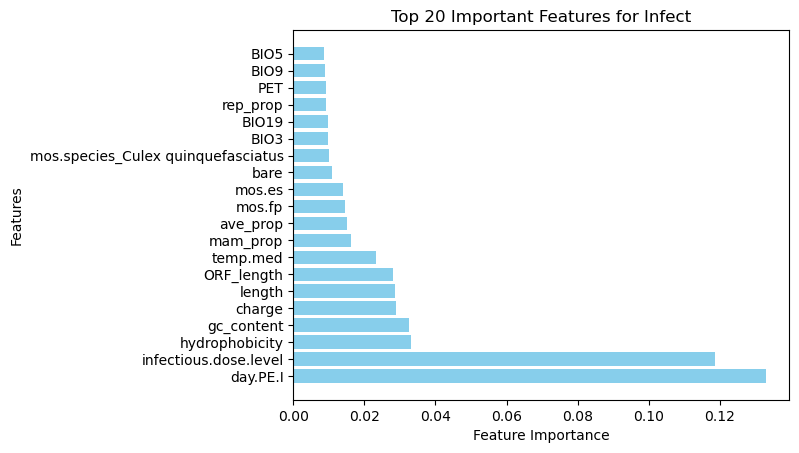

In [234]:
import matplotlib.pyplot as plt

rf_feature_importance_infect_top_20 = rf_feature_importance_infect.nlargest(20, rf_feature_importance_infect)

#plotting a bar chart
plt.barh(rf_feature_importance_infect_top_20.index, rf_feature_importance_infect_top_20.iloc[:, 0], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Important Features for Infect')

plt.show()

## SVM

In [235]:
from sklearn import svm

svm_infect = svm.SVC(probability=True)#enabling probability allows for AUC to be calculated
svm_dissem = svm.SVC(probability=True)
svm_trans = svm.SVC(probability=True)

svm_infect = svm_infect.fit(X_train_infect, y_train_infect)
svm_dissem = svm_dissem.fit(X_train_dissem, y_train_dissem)
svm_trans = svm_trans.fit(X_train_trans, y_train_trans)

svm_y_predict_infect = svm_infect.predict(X_test_infect)
svm_y_predict_dissem = svm_dissem.predict(X_test_dissem)
svm_y_predict_trans = svm_trans.predict(X_test_trans)

#binary version to compare
svm_infect_binary = svm.SVC(probability=True)
svm_dissem_binary = svm.SVC(probability=True)
svm_trans_binary = svm.SVC(probability=True)

svm_infect_binary = svm_infect_binary.fit(X_train_infect_binary, y_train_infect_binary)
svm_dissem_binary = svm_dissem_binary.fit(X_train_dissem_binary, y_train_dissem_binary)
svm_trans_binary = svm_trans_binary.fit(X_train_trans_binary, y_train_trans_binary)

svm_y_predict_infect_binary = svm_infect_binary.predict(X_test_infect_binary)
svm_y_predict_dissem_binary = svm_dissem_binary.predict(X_test_dissem_binary)
svm_y_predict_trans_binary = svm_trans_binary.predict(X_test_trans_binary)

In [236]:
#uses probability for AUC
svm_y_predict_infect_prob = svm_infect.predict_proba(X_test_infect)
svm_y_predict_dissem_prob = svm_dissem.predict_proba(X_test_dissem)
svm_y_predict_trans_prob = svm_trans.predict_proba(X_test_trans)


print(f'Infection\n{classification_report(y_test_infect, svm_y_predict_infect)}')
print('MCC:', matthews_corrcoef(y_test_infect, svm_y_predict_infect))
print('AUC:', roc_auc_score(y_test_infect_auc, svm_y_predict_infect_prob, multi_class='ovo'))

print(f'Dissemination\n{classification_report(y_test_dissem, svm_y_predict_dissem)}')
print('MCC:', matthews_corrcoef(y_test_dissem, svm_y_predict_dissem))
print('AUC:', roc_auc_score(y_test_dissem_auc, svm_y_predict_dissem_prob, multi_class='ovo'))

print(f'Transmission\n{classification_report(y_test_trans, svm_y_predict_trans)}')
print('MCC:', matthews_corrcoef(y_test_trans, svm_y_predict_trans))
print('AUC:', roc_auc_score(y_test_trans_auc, svm_y_predict_trans_prob, multi_class='ovo'))


Infection
              precision    recall  f1-score   support

           0       0.70      0.27      0.39       218
           1       0.58      0.51      0.54       607
           2       0.71      0.86      0.78       946

    accuracy                           0.67      1771
   macro avg       0.66      0.55      0.57      1771
weighted avg       0.66      0.67      0.65      1771

MCC: 0.39783301509829816
AUC: 0.8146000415968282
Dissemination
              precision    recall  f1-score   support

           0       0.65      0.53      0.58       251
           1       0.61      0.26      0.36       264
           2       0.69      0.90      0.78       662

    accuracy                           0.68      1177
   macro avg       0.65      0.56      0.58      1177
weighted avg       0.66      0.68      0.64      1177

MCC: 0.41128527014114363
AUC: 0.7918744037389788
Transmission
              precision    recall  f1-score   support

           0       0.77      0.59      0.67     

In [237]:
#binary version to compare

#uses probability for AUC
svm_y_predict_infect_prob_binary = svm_infect_binary.predict_proba(X_test_infect_binary)
svm_y_predict_dissem_prob_binary = svm_dissem_binary.predict_proba(X_test_dissem_binary)
svm_y_predict_trans_prob_binary = svm_trans_binary.predict_proba(X_test_trans_binary)


print(f'Infection\n{classification_report(y_test_infect_binary, svm_y_predict_infect_binary)}')
print('MCC:', matthews_corrcoef(y_test_infect_binary, svm_y_predict_infect_binary))
print('AUC:', roc_auc_score(y_test_infect_auc_binary, svm_y_predict_infect_prob_binary)) #ovo = 'one vs one'

print(f'Dissemination\n{classification_report(y_test_dissem_binary, svm_y_predict_dissem_binary)}')
print('MCC:', matthews_corrcoef(y_test_dissem_binary, svm_y_predict_dissem_binary))
print('AUC:', roc_auc_score(y_test_dissem_auc_binary, svm_y_predict_dissem_prob_binary))

print(f'Transmission\n{classification_report(y_test_trans_binary, svm_y_predict_trans_binary)}')
print('MCC:', matthews_corrcoef(y_test_trans_binary, svm_y_predict_trans_binary))
print('AUC:', roc_auc_score(y_test_trans_auc_binary, svm_y_predict_trans_prob_binary))

Infection
              precision    recall  f1-score   support

           0       0.75      0.24      0.36       218
           1       0.90      0.99      0.94      1553

    accuracy                           0.90      1771
   macro avg       0.83      0.61      0.65      1771
weighted avg       0.88      0.90      0.87      1771

MCC: 0.3864153278483637
AUC: 0.8479991375083444
Dissemination
              precision    recall  f1-score   support

           0       0.77      0.43      0.55       251
           1       0.86      0.97      0.91       926

    accuracy                           0.85      1177
   macro avg       0.82      0.70      0.73      1177
weighted avg       0.84      0.85      0.83      1177

MCC: 0.5007013567843865
AUC: 0.834254773562338
Transmission
              precision    recall  f1-score   support

           0       0.82      0.55      0.66       338
           1       0.74      0.91      0.82       483

    accuracy                           0.76       

## Naive Bayes

In [238]:
from sklearn.naive_bayes import GaussianNB

nb_infect = GaussianNB()
nb_dissem = GaussianNB()
nb_trans = GaussianNB()

nb_infect = nb_infect.fit(X_train_infect, y_train_infect)
nb_dissem = nb_dissem.fit(X_train_dissem, y_train_dissem)
nb_trans = nb_trans.fit(X_train_trans, y_train_trans)

nb_y_predict_infect = nb_infect.predict(X_test_infect)
nb_y_predict_dissem = nb_dissem.predict(X_test_dissem)
nb_y_predict_trans = nb_trans.predict(X_test_trans)

#binary version to compare
nb_infect_binary = GaussianNB()
nb_dissem_binary = GaussianNB()
nb_trans_binary = GaussianNB()

nb_infect_binary = nb_infect_binary.fit(X_train_infect_binary, y_train_infect_binary)
nb_dissem_binary = nb_dissem_binary.fit(X_train_dissem_binary, y_train_dissem_binary)
nb_trans_binary = nb_trans_binary.fit(X_train_trans_binary, y_train_trans_binary)

nb_y_predict_infect_binary = nb_infect_binary.predict(X_test_infect_binary)
nb_y_predict_dissem_binary = nb_dissem_binary.predict(X_test_dissem_binary)
nb_y_predict_trans_binary = nb_trans_binary.predict(X_test_trans_binary)

In [239]:
#uses probability for AUC
nb_y_predict_infect_prob = nb_infect.predict_proba(X_test_infect)
nb_y_predict_dissem_prob = nb_dissem.predict_proba(X_test_dissem)
nb_y_predict_trans_prob = nb_trans.predict_proba(X_test_trans)


print(f'Infection\n{classification_report(y_test_infect, nb_y_predict_infect)}')
print('MCC:', matthews_corrcoef(y_test_infect, nb_y_predict_infect))
print('AUC:', roc_auc_score(y_test_infect_auc, nb_y_predict_infect_prob, multi_class='ovo'))

print(f'Dissemination\n{classification_report(y_test_infect, nb_y_predict_infect)}')
print('MCC:', matthews_corrcoef(y_test_dissem, nb_y_predict_dissem))
print('AUC:', roc_auc_score(y_test_dissem_auc, nb_y_predict_dissem_prob, multi_class='ovo'))

print(f'Transmission\n{classification_report(y_test_trans, nb_y_predict_trans)}')
print('MCC:', matthews_corrcoef(y_test_trans, nb_y_predict_trans))
print('AUC:', roc_auc_score(y_test_trans_auc, nb_y_predict_trans_prob, multi_class='ovo'))

Infection
              precision    recall  f1-score   support

           0       0.15      0.87      0.26       218
           1       0.54      0.03      0.07       607
           2       0.64      0.34      0.44       946

    accuracy                           0.30      1771
   macro avg       0.44      0.41      0.26      1771
weighted avg       0.55      0.30      0.29      1771

MCC: 0.11043318195724898
AUC: 0.6517113956314065
Dissemination
              precision    recall  f1-score   support

           0       0.15      0.87      0.26       218
           1       0.54      0.03      0.07       607
           2       0.64      0.34      0.44       946

    accuracy                           0.30      1771
   macro avg       0.44      0.41      0.26      1771
weighted avg       0.55      0.30      0.29      1771

MCC: 0.16059275155522487
AUC: 0.6772161195753731
Transmission
              precision    recall  f1-score   support

           0       0.78      0.14      0.24     

In [240]:
#binary version to compare

#uses probability for AUC
nb_y_predict_infect_prob_binary = nb_infect_binary.predict_proba(X_test_infect_binary)
nb_y_predict_dissem_prob_binary = nb_dissem_binary.predict_proba(X_test_dissem_binary)
nb_y_predict_trans_prob_binary = nb_trans_binary.predict_proba(X_test_trans_binary)


print(f'Infection\n{classification_report(y_test_infect_binary, nb_y_predict_infect_binary)}')
print('MCC:', matthews_corrcoef(y_test_infect_binary, nb_y_predict_infect_binary))
print('AUC:', roc_auc_score(y_test_infect_auc_binary, nb_y_predict_infect_prob_binary)) #ovo = 'one vs one'

print(f'Dissemination\n{classification_report(y_test_dissem_binary, nb_y_predict_dissem_binary)}')
print('MCC:', matthews_corrcoef(y_test_dissem_binary, nb_y_predict_dissem_binary))
print('AUC:', roc_auc_score(y_test_dissem_auc_binary, nb_y_predict_dissem_prob_binary))

print(f'Transmission\n{classification_report(y_test_trans_binary, nb_y_predict_trans_binary)}')
print('MCC:', matthews_corrcoef(y_test_trans_binary, nb_y_predict_trans_binary))
print('AUC:', roc_auc_score(y_test_trans_auc_binary, nb_y_predict_trans_prob_binary))

Infection
              precision    recall  f1-score   support

           0       0.13      0.95      0.23       218
           1       0.95      0.13      0.23      1553

    accuracy                           0.23      1771
   macro avg       0.54      0.54      0.23      1771
weighted avg       0.85      0.23      0.23      1771

MCC: 0.08664619957459226
AUC: 0.6401659705689491
Dissemination
              precision    recall  f1-score   support

           0       0.25      0.93      0.40       251
           1       0.93      0.25      0.39       926

    accuracy                           0.39      1177
   macro avg       0.59      0.59      0.39      1177
weighted avg       0.79      0.39      0.39      1177

MCC: 0.17926186473695369
AUC: 0.6645254833796563
Transmission
              precision    recall  f1-score   support

           0       0.74      0.37      0.49       338
           1       0.67      0.91      0.77       483

    accuracy                           0.69    

## XGBoost

In [241]:
from xgboost import XGBClassifier

xgb_infect = XGBClassifier()
xgb_dissem = XGBClassifier()
xgb_trans = XGBClassifier()

xgb_infect = xgb_infect.fit(X_train_infect, y_train_infect)
xgb_dissem = xgb_dissem.fit(X_train_dissem, y_train_dissem)
xgb_trans = xgb_trans.fit(X_train_trans, y_train_trans)

xgb_y_predict_infect = xgb_infect.predict(X_test_infect)
xgb_y_predict_dissem = xgb_dissem.predict(X_test_dissem)
xgb_y_predict_trans = xgb_trans.predict(X_test_trans)

#binary version to compare
xgb_infect_binary = XGBClassifier()
xgb_dissem_binary = XGBClassifier()
xgb_trans_binary = XGBClassifier()

xgb_infect_binary = xgb_infect_binary.fit(X_train_infect_binary, y_train_infect_binary)
xgb_dissem_binary = xgb_dissem_binary.fit(X_train_dissem_binary, y_train_dissem_binary)
xgb_trans_binary = xgb_trans_binary.fit(X_train_trans_binary, y_train_trans_binary)

xgb_y_predict_infect_binary = xgb_infect_binary.predict(X_test_infect_binary)
xgb_y_predict_dissem_binary = xgb_dissem_binary.predict(X_test_dissem_binary)
xgb_y_predict_trans_binary = xgb_trans_binary.predict(X_test_trans_binary)

In [242]:
#uses probability for AUC
xgb_y_predict_infect_prob = xgb_infect.predict_proba(X_test_infect)
xgb_y_predict_dissem_prob = xgb_dissem.predict_proba(X_test_dissem)
xgb_y_predict_trans_prob = xgb_trans.predict_proba(X_test_trans)

print(f'Infection\n{classification_report(y_test_infect, xgb_y_predict_infect)}')
print('MCC:', matthews_corrcoef(y_test_infect, xgb_y_predict_infect))
print('AUC:', roc_auc_score(y_test_infect_auc, xgb_y_predict_infect_prob, multi_class='ovo'))

print(f'Dissemination\n{classification_report(y_test_dissem, xgb_y_predict_dissem)}')
print('MCC:', matthews_corrcoef(y_test_dissem, xgb_y_predict_dissem))
print('AUC:', roc_auc_score(y_test_dissem_auc, xgb_y_predict_dissem_prob, multi_class='ovo'))

print(f'Transmission\n{classification_report(y_test_trans, xgb_y_predict_trans)}')
print('MCC:', matthews_corrcoef(y_test_trans, xgb_y_predict_trans))
print('AUC:', roc_auc_score(y_test_trans_auc, xgb_y_predict_trans_prob, multi_class='ovo'))

Infection
              precision    recall  f1-score   support

           0       0.70      0.54      0.61       218
           1       0.69      0.64      0.66       607
           2       0.81      0.88      0.84       946

    accuracy                           0.76      1771
   macro avg       0.73      0.69      0.71      1771
weighted avg       0.75      0.76      0.75      1771

MCC: 0.5733686822891103
AUC: 0.8768546070737795
Dissemination
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       251
           1       0.56      0.52      0.54       264
           2       0.79      0.83      0.81       662

    accuracy                           0.72      1177
   macro avg       0.68      0.66      0.67      1177
weighted avg       0.71      0.72      0.72      1177

MCC: 0.5149137423236478
AUC: 0.8571268258123513
Transmission
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       

In [243]:
#binary version to compare

#uses probability for AUC
xgb_y_predict_infect_prob_binary = xgb_infect_binary.predict_proba(X_test_infect_binary)
xgb_y_predict_dissem_prob_binary = xgb_dissem_binary.predict_proba(X_test_dissem_binary)
xgb_y_predict_trans_prob_binary = xgb_trans_binary.predict_proba(X_test_trans_binary)


print(f'Infection\n{classification_report(y_test_infect_binary, xgb_y_predict_infect_binary)}')
print('MCC:', matthews_corrcoef(y_test_infect_binary, xgb_y_predict_infect_binary))
print('AUC:', roc_auc_score(y_test_infect_auc_binary, xgb_y_predict_infect_prob_binary)) #ovo = 'one vs one'

print(f'Dissemination\n{classification_report(y_test_dissem_binary, xgb_y_predict_dissem_binary)}')
print('MCC:', matthews_corrcoef(y_test_dissem_binary, xgb_y_predict_dissem_binary))
print('AUC:', roc_auc_score(y_test_dissem_auc_binary, xgb_y_predict_dissem_prob_binary))

print(f'Transmission\n{classification_report(y_test_trans_binary, xgb_y_predict_trans_binary)}')
print('MCC:', matthews_corrcoef(y_test_trans_binary, xgb_y_predict_trans_binary))
print('AUC:', roc_auc_score(y_test_trans_auc_binary, xgb_y_predict_trans_prob_binary))

Infection
              precision    recall  f1-score   support

           0       0.72      0.53      0.61       218
           1       0.94      0.97      0.95      1553

    accuracy                           0.92      1771
   macro avg       0.83      0.75      0.78      1771
weighted avg       0.91      0.92      0.91      1771

MCC: 0.5773581037050959
AUC: 0.8957551823342805
Dissemination
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       251
           1       0.90      0.94      0.92       926

    accuracy                           0.87      1177
   macro avg       0.81      0.78      0.79      1177
weighted avg       0.86      0.87      0.87      1177

MCC: 0.5903706544058008
AUC: 0.8912019309371586
Transmission
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       338
           1       0.81      0.87      0.84       483

    accuracy                           0.81      

## Neural network (MLP)

In [244]:
from sklearn.neural_network import MLPClassifier

mlp_infect = MLPClassifier(max_iter=5000)
mlp_dissem = MLPClassifier(max_iter=5000)
mlp_trans = MLPClassifier(max_iter=5000)

mlp_infect.fit(X_train_infect, y_train_infect)
mlp_dissem.fit(X_train_dissem, y_train_dissem)
mlp_trans.fit(X_train_trans, y_train_trans)

mlp_y_predict_infect = mlp_infect.predict(X_test_infect)
mlp_y_predict_dissem = mlp_dissem.predict(X_test_dissem)
mlp_y_predict_trans = mlp_trans.predict(X_test_trans)

#binary version to compare
mlp_infect_binary = MLPClassifier(max_iter=5000)
mlp_dissem_binary = MLPClassifier(max_iter=5000)
mlp_trans_binary = MLPClassifier(max_iter=5000)

mlp_infect_binary = mlp_infect_binary.fit(X_train_infect_binary, y_train_infect_binary)
mlp_dissem_binary = mlp_dissem_binary.fit(X_train_dissem_binary, y_train_dissem_binary)
mlp_trans_binary = mlp_trans_binary.fit(X_train_trans_binary, y_train_trans_binary)

mlp_y_predict_infect_binary = mlp_infect_binary.predict(X_test_infect_binary)
mlp_y_predict_dissem_binary = mlp_dissem_binary.predict(X_test_dissem_binary)
mlp_y_predict_trans_binary = mlp_trans_binary.predict(X_test_trans_binary)

In [245]:
mlp_y_predict_infect_prob = mlp_infect.predict_proba(X_test_infect)
mlp_y_predict_dissem_prob = mlp_dissem.predict_proba(X_test_dissem)
mlp_y_predict_trans_prob = mlp_trans.predict_proba(X_test_trans)

print(f'Infection\n{classification_report(y_test_infect, mlp_y_predict_infect)}')
print('MCC:', matthews_corrcoef(y_test_infect, mlp_y_predict_infect))
print('AUC:', roc_auc_score(y_test_infect_auc, mlp_y_predict_infect_prob, multi_class='ovo'))

print(f'Dissemination\n{classification_report(y_test_dissem, xgb_y_predict_dissem)}')
print('MCC:', matthews_corrcoef(y_test_dissem, mlp_y_predict_dissem))
print('AUC:', roc_auc_score(y_test_dissem_auc, mlp_y_predict_dissem_prob, multi_class='ovo'))

print(f'Transmission\n{classification_report(y_test_trans, xgb_y_predict_trans)}')
print('MCC:', matthews_corrcoef(y_test_trans, mlp_y_predict_trans))
print('AUC:', roc_auc_score(y_test_trans_auc, mlp_y_predict_trans_prob, multi_class='ovo'))

Infection
              precision    recall  f1-score   support

           0       0.68      0.46      0.55       218
           1       0.65      0.63      0.64       607
           2       0.79      0.86      0.82       946

    accuracy                           0.73      1771
   macro avg       0.70      0.65      0.67      1771
weighted avg       0.73      0.73      0.73      1771

MCC: 0.5275496613447942
AUC: 0.8633660420719967
Dissemination
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       251
           1       0.56      0.52      0.54       264
           2       0.79      0.83      0.81       662

    accuracy                           0.72      1177
   macro avg       0.68      0.66      0.67      1177
weighted avg       0.71      0.72      0.72      1177

MCC: 0.5146185084312977
AUC: 0.8373335529744063
Transmission
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       

In [246]:
#binary version to compare

#uses probability for AUC
mlp_y_predict_infect_prob_binary = mlp_infect_binary.predict_proba(X_test_infect_binary)
mlp_y_predict_dissem_prob_binary = mlp_dissem_binary.predict_proba(X_test_dissem_binary)
mlp_y_predict_trans_prob_binary = mlp_trans_binary.predict_proba(X_test_trans_binary)


print(f'Infection\n{classification_report(y_test_infect_binary, mlp_y_predict_infect_binary)}')
print('MCC:', matthews_corrcoef(y_test_infect_binary, mlp_y_predict_infect_binary))
print('AUC:', roc_auc_score(y_test_infect_auc_binary, mlp_y_predict_infect_prob_binary)) #ovo = 'one vs one'

print(f'Dissemination\n{classification_report(y_test_dissem_binary, mlp_y_predict_dissem_binary)}')
print('MCC:', matthews_corrcoef(y_test_dissem_binary, mlp_y_predict_dissem_binary))
print('AUC:', roc_auc_score(y_test_dissem_auc_binary, mlp_y_predict_dissem_prob_binary))

print(f'Transmission\n{classification_report(y_test_trans_binary, mlp_y_predict_trans_binary)}')
print('MCC:', matthews_corrcoef(y_test_trans_binary, mlp_y_predict_trans_binary))
print('AUC:', roc_auc_score(y_test_trans_auc_binary, mlp_y_predict_trans_prob_binary))

Infection
              precision    recall  f1-score   support

           0       0.70      0.45      0.55       218
           1       0.93      0.97      0.95      1553

    accuracy                           0.91      1771
   macro avg       0.81      0.71      0.75      1771
weighted avg       0.90      0.91      0.90      1771

MCC: 0.5159020955948969
AUC: 0.8915859803753612
Dissemination
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       251
           1       0.91      0.92      0.91       926

    accuracy                           0.86      1177
   macro avg       0.80      0.78      0.79      1177
weighted avg       0.86      0.86      0.86      1177

MCC: 0.5785325182144534
AUC: 0.8689023603211345
Transmission
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       338
           1       0.80      0.83      0.81       483

    accuracy                           0.78      

## Bayesian optimisation of random forest

In [313]:
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from skopt.space import Real, Integer, Categorical

search_space_rf = {
    'n_estimators': Integer(100, 1000),
    'criterion': Categorical(['gini', 'log_loss', 'entropy']),
    'max_depth': Integer(10, 30),
    'min_samples_split': Integer(2, 40),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2', 0.2, 0.4, 0.6, 0.8]),
    'bootstrap': Categorical([True])}

#consistent cv to be able to analyse folds once best MCC is found
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=82)

#random search space to compare:
random_search_space_rf = {
    'n_estimators': [100, 200, 400, 600, 800, 1000],
    'criterion': ['gini', 'log_loss', 'entropy'],
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_split': [2, 4, 6, 8, 10, 15, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'bootstrap': [True]}

### Random search to compare to bayesian optimisation

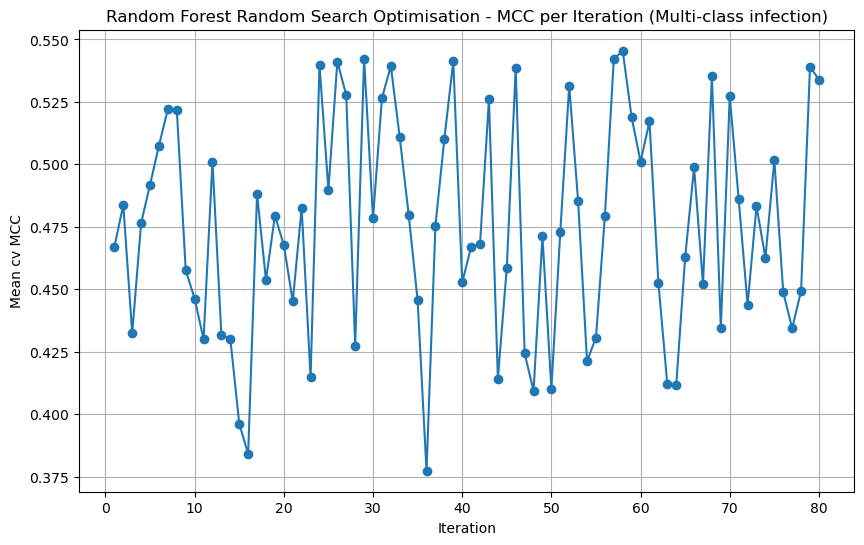

Best Parameters: {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 0.6, 'max_depth': 25, 'criterion': 'entropy', 'bootstrap': True}
Best MCC Score (highest mean cv score from training data): 0.5454966349649792
MCC (from test data): 0.55738939723532


In [314]:
random_search_infect_rf = RandomizedSearchCV(
    rf_infect,
    param_distributions=random_search_space_rf,
    n_iter=80,
    cv=cv_strategy,
    n_jobs=-1,
    scoring='matthews_corrcoef',
    random_state=20)

random_search_infect_rf.fit(X_train_infect, y_train_infect)

results = random_search_infect_rf.cv_results_

#Extract the iteration numbers and corresponding mean test scores
iterations = range(1, len(results['mean_test_score']) + 1)
mean_test_scores = results['mean_test_score']

#Plot the MCC for each iteration
plt.figure(figsize=(10, 6))
plt.plot(iterations, mean_test_scores, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean cv MCC')
plt.title('Random Forest Random Search Optimisation - MCC per Iteration (Multi-class infection)')
plt.grid(True)
plt.show()


print("Best Parameters:", random_search_infect_rf.best_params_)

print("Best MCC Score (highest mean cv score from training data):", random_search_infect_rf.best_score_)

best_y_pred_infect_rf = random_search_infect_rf.best_estimator_.predict(X_test_infect)
print("MCC (from test data):", matthews_corrcoef(y_test_infect, best_y_pred_infect_rf))

### Infection optimisation (RF)

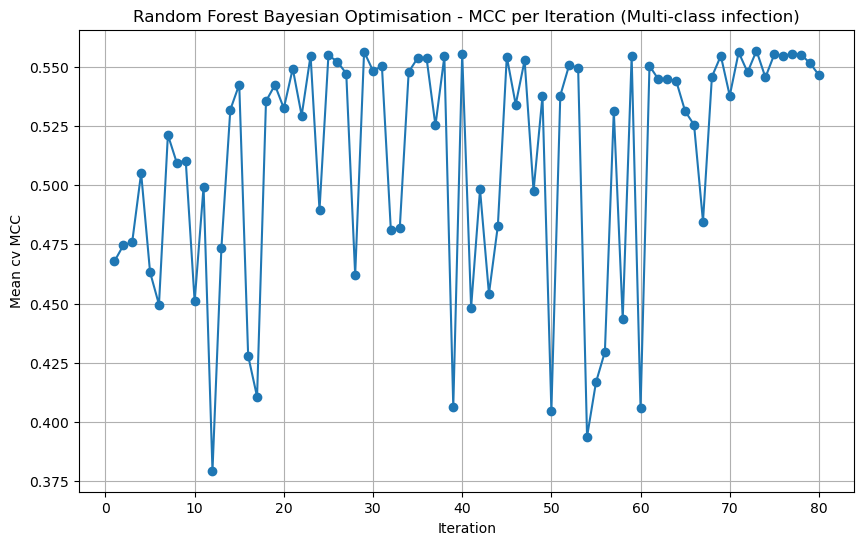

Best Parameters: OrderedDict([('bootstrap', True), ('criterion', 'log_loss'), ('max_depth', 20), ('max_features', 0.4), ('min_samples_leaf', 1), ('min_samples_split', 6), ('n_estimators', 1000)])
Best MCC Score (highest mean cv score from training data): 0.5567416316758635
MCC (from test data): 0.5590035004851458


In [556]:

bayes_search_infect_rf = BayesSearchCV(
    rf_infect,
    search_spaces=search_space_rf,
    n_iter=80,
    cv=cv_strategy,
    n_jobs=-1,
    scoring='matthews_corrcoef',
    random_state=20)

bayes_search_infect_rf.fit(X_train_infect, y_train_infect)

results = bayes_search_infect_rf.cv_results_

#Extract the iteration numbers and corresponding mean test scores
iterations = range(1, len(results['mean_test_score']) + 1)
mean_test_scores = results['mean_test_score']

#Plot the MCC for each iteration
plt.figure(figsize=(10, 6))
plt.plot(iterations, mean_test_scores, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean cv MCC')
plt.title('Random Forest Bayesian Optimisation - MCC per Iteration (Multi-class infection)')
plt.grid(True)
plt.show()

print("Best Parameters:", bayes_search_infect_rf.best_params_)
print("Best MCC Score (highest mean cv score from training data):", bayes_search_infect_rf.best_score_)

best_y_pred_infect_rf = bayes_search_infect_rf.best_estimator_.predict(X_test_infect)
print("MCC (from test data):", matthews_corrcoef(y_test_infect, best_y_pred_infect_rf))



### Dissemination optimisation (RF)

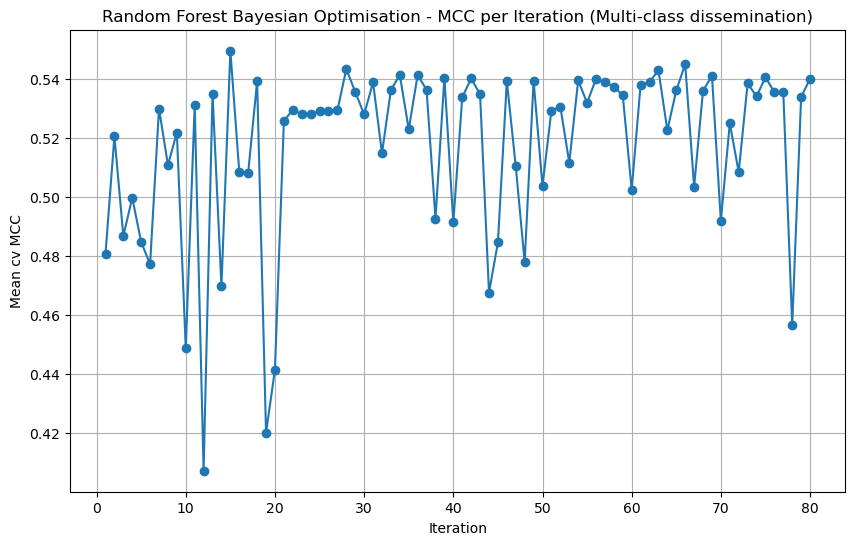

Best Parameters: OrderedDict([('bootstrap', True), ('criterion', 'log_loss'), ('max_depth', 10), ('max_features', 0.8), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 100)])
Best MCC Score (highest mean cv score from training data): 0.5494621282562984
MCC (from test data): 0.5256239037428536


In [316]:
bayes_search_dissem_rf = BayesSearchCV(
    rf_dissem,
    search_spaces=search_space_rf,
    n_iter=80,
    cv=cv_strategy,
    n_jobs=-1,
    scoring='matthews_corrcoef',
    random_state=20)

bayes_search_dissem_rf.fit(X_train_dissem, y_train_dissem)

results = bayes_search_dissem_rf.cv_results_

#Extract the iteration numbers and corresponding mean test scores
iterations = range(1, len(results['mean_test_score']) + 1)
mean_test_scores = results['mean_test_score']

#Plot the MCC for each iteration
plt.figure(figsize=(10, 6))
plt.plot(iterations, mean_test_scores, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean cv MCC')
plt.title('Random Forest Bayesian Optimisation - MCC per Iteration (Multi-class dissemination)')
plt.grid(True)
plt.show()

print("Best Parameters:", bayes_search_dissem_rf.best_params_)
print("Best MCC Score (highest mean cv score from training data):", bayes_search_dissem_rf.best_score_)

best_y_pred_dissem_rf = bayes_search_dissem_rf.best_estimator_.predict(X_test_dissem)
print("MCC (from test data):", matthews_corrcoef(y_test_dissem, best_y_pred_dissem_rf))

In [317]:
'''
The search space generated for all 3 showed signs of overfitting in the dissemination data,
with a high MCC of 0.57 from the training data and an MCC of 0.51 from the test data.

To overcome this, a new search space is used to decrease overfitting.
'''
search_space_rf_dissem = {
    'n_estimators': Integer(100, 600), #decreased estimators range
    'criterion': Categorical(['gini', 'log_loss', 'entropy']),
    'max_depth': Integer(5, 25), #decreased range
    'min_samples_split': Integer(5, 40), #increased start range
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2', 0.2, 0.4, 0.6, 0.8]),
    'bootstrap': Categorical([True])}

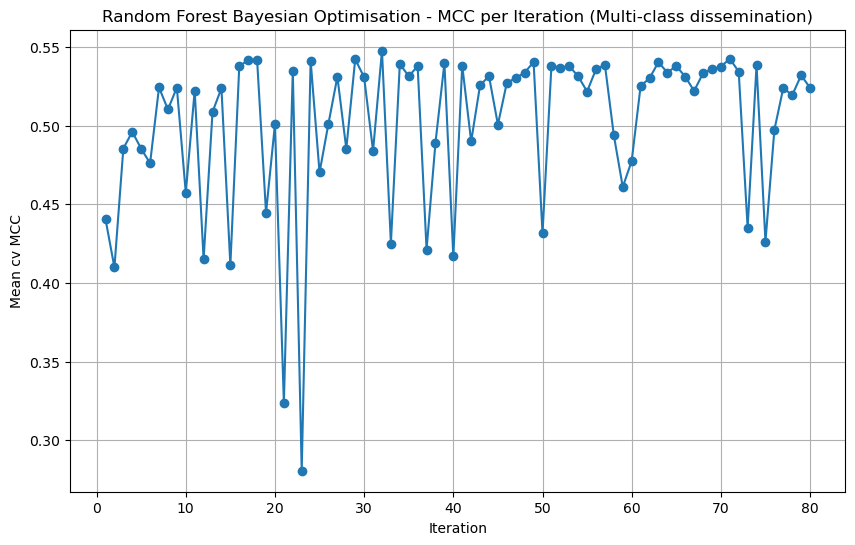

Best Parameters: OrderedDict([('bootstrap', True), ('criterion', 'gini'), ('max_depth', 16), ('max_features', 0.6), ('min_samples_leaf', 1), ('min_samples_split', 5), ('n_estimators', 352)])
Best MCC Score (highest mean cv score from training data): 0.547710615241103
MCC (from test data): 0.5357129769356007


In [318]:
bayes_search_dissem_rf = BayesSearchCV(
    rf_dissem,
    search_spaces=search_space_rf_dissem,
    n_iter=80,
    cv=cv_strategy,
    n_jobs=-1,
    scoring='matthews_corrcoef',
    random_state=20)

bayes_search_dissem_rf.fit(X_train_dissem, y_train_dissem)

results = bayes_search_dissem_rf.cv_results_

#Extract the iteration numbers and corresponding mean test scores
iterations = range(1, len(results['mean_test_score']) + 1)
mean_test_scores = results['mean_test_score']

#Plot the MCC for each iteration
plt.figure(figsize=(10, 6))
plt.plot(iterations, mean_test_scores, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean cv MCC')
plt.title('Random Forest Bayesian Optimisation - MCC per Iteration (Multi-class dissemination)')
plt.grid(True)
plt.show()

print("Best Parameters:", bayes_search_dissem_rf.best_params_)
print("Best MCC Score (highest mean cv score from training data):", bayes_search_dissem_rf.best_score_)

best_y_pred_dissem_rf = bayes_search_dissem_rf.best_estimator_.predict(X_test_dissem)
print("MCC (from test data):", matthews_corrcoef(y_test_dissem, best_y_pred_dissem_rf))


 ### Transmission optimisation (RF)

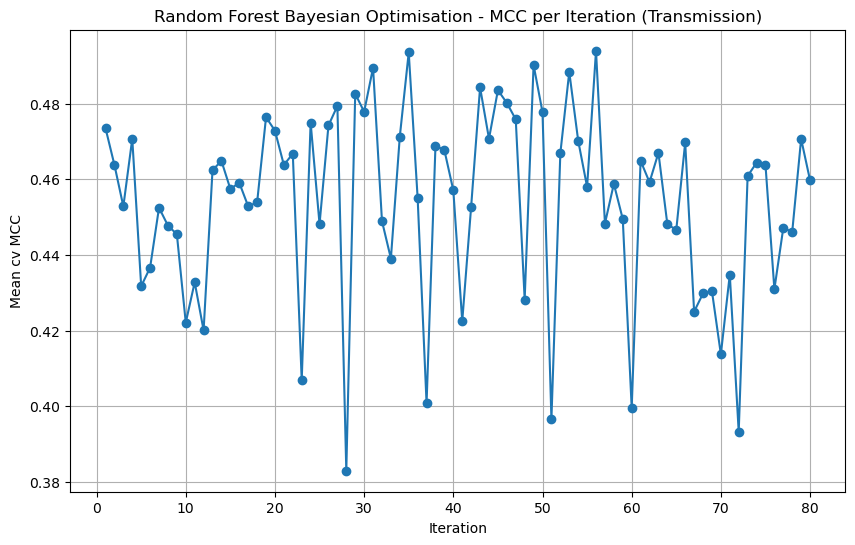

Best Parameters: OrderedDict([('bootstrap', True), ('criterion', 'gini'), ('max_depth', 10), ('max_features', 0.4), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 1000)])
Best MCC Score (highest mean cv score from training data): 0.49396646693193436
MCC (from test data): 0.5169836528959125


In [319]:
bayes_search_trans_rf = BayesSearchCV(
    rf_trans,
    search_spaces=search_space_rf,
    n_iter=80,
    cv=cv_strategy,
    n_jobs=-1,
    scoring='matthews_corrcoef',
    random_state=20)

bayes_search_trans_rf.fit(X_train_trans, y_train_trans)

results = bayes_search_trans_rf.cv_results_

#Extract the iteration numbers and corresponding mean test scores
iterations = range(1, len(results['mean_test_score']) + 1)
mean_test_scores = results['mean_test_score']

#Plot the MCC for each iteration
plt.figure(figsize=(10, 6))
plt.plot(iterations, mean_test_scores, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean cv MCC')
plt.title('Random Forest Bayesian Optimisation - MCC per Iteration (Transmission)')
plt.grid(True)
plt.show()

print("Best Parameters:", bayes_search_trans_rf.best_params_)
print("Best MCC Score (highest mean cv score from training data):", bayes_search_trans_rf.best_score_)

best_y_pred_trans_rf = bayes_search_trans_rf.best_estimator_.predict(X_test_trans)
print("MCC (from test data):", matthews_corrcoef(y_test_trans, best_y_pred_trans_rf))

## Bayesian optimisation of XGBoost

In [320]:
search_space_xgb = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(4, 20),
    'learning_rate': Real(0.05, 0.4),
    'gamma': Real(0, 1),
    'reg_alpha': Real(0.3, 0.6), #for regularization
    'reg_lambda': Real(0.3, 0.6)} #for regularization

### Infection optimisation (XGB)

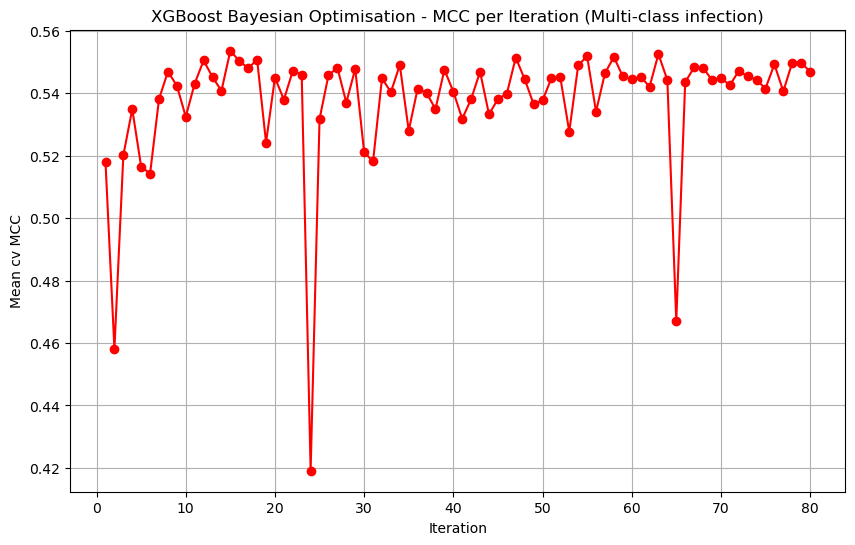

Best Parameters: OrderedDict([('gamma', 0.0), ('learning_rate', 0.05007672568382982), ('max_depth', 4), ('n_estimators', 1000), ('reg_alpha', 0.3), ('reg_lambda', 0.3)])
Best MCC Score (highest mean cv score from training data): 0.5536461982269134
MCC (from test data): 0.5761783154695435


In [321]:
bayes_search_infect_xgb = BayesSearchCV(
    xgb_infect,
    search_spaces=search_space_xgb,
    n_iter=80,
    cv=cv_strategy,
    n_jobs=-1,
    scoring='matthews_corrcoef',
    random_state=20)

bayes_search_infect_xgb.fit(X_train_infect, y_train_infect)

results = bayes_search_infect_xgb.cv_results_

#Extract the iteration numbers and corresponding mean test scores
iterations = range(1, len(results['mean_test_score']) + 1)
mean_test_scores = results['mean_test_score']

#Plot the MCC for each iteration
plt.figure(figsize=(10, 6))
plt.plot(iterations, mean_test_scores, marker='o', color='red', markerfacecolor='red')
plt.xlabel('Iteration')
plt.ylabel('Mean cv MCC')
plt.title('XGBoost Bayesian Optimisation - MCC per Iteration (Multi-class infection)')
plt.grid(True)
plt.show()

print("Best Parameters:", bayes_search_infect_xgb.best_params_)
print("Best MCC Score (highest mean cv score from training data):", bayes_search_infect_xgb.best_score_)

best_y_pred_infect_xgb = bayes_search_infect_xgb.best_estimator_.predict(X_test_infect)
print("MCC (from test data):", matthews_corrcoef(y_test_infect, best_y_pred_infect_xgb))

### Dissemenation optimisation (XGB)

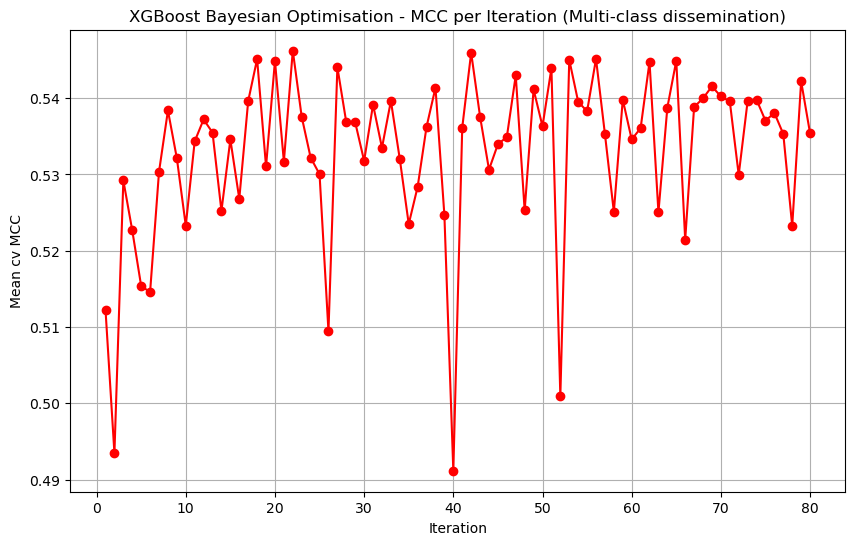

Best Parameters: OrderedDict([('gamma', 0.08517179489274393), ('learning_rate', 0.26723064999672336), ('max_depth', 13), ('n_estimators', 100), ('reg_alpha', 0.5675720170441773), ('reg_lambda', 0.3556372102481734)])
Best MCC Score (highest mean cv score from training data): 0.5462241494854647
MCC (from test data): 0.530355236786583


In [322]:
bayes_search_dissem_xgb = BayesSearchCV(
    xgb_dissem,
    search_spaces=search_space_xgb,
    n_iter=80,
    cv=cv_strategy,
    n_jobs=-1,
    scoring='matthews_corrcoef',
    random_state=20)

bayes_search_dissem_xgb.fit(X_train_dissem, y_train_dissem)

results = bayes_search_dissem_xgb.cv_results_

#Extract the iteration numbers and corresponding mean test scores
iterations = range(1, len(results['mean_test_score']) + 1)
mean_test_scores = results['mean_test_score']

#Plot the MCC for each iteration
plt.figure(figsize=(10, 6))
plt.plot(iterations, mean_test_scores, marker='o', color='red', markerfacecolor='red')
plt.xlabel('Iteration')
plt.ylabel('Mean cv MCC')
plt.title('XGBoost Bayesian Optimisation - MCC per Iteration (Multi-class dissemination)')
plt.grid(True)
plt.show()

print("Best Parameters:", bayes_search_dissem_xgb.best_params_)
print("Best MCC Score (highest mean cv score from training data):", bayes_search_dissem_xgb.best_score_)

best_y_pred_dissem_xgb = bayes_search_dissem_xgb.best_estimator_.predict(X_test_dissem)
print("MCC (from test data):", matthews_corrcoef(y_test_dissem, best_y_pred_dissem_xgb))

In [421]:
'''
The search space generated for all 3 showed signs of overfitting again in the dissemination 
data, with a high MCC of 0.557 from the training data and an MCC of 0.522 from the test data.

To overcome this, a new search space is used to decrease overfitting.
'''
search_space_xgb_dissem = {
    'n_estimators': Integer(100, 600), #decreased range 
    'max_depth': Integer(4, 14),
    'learning_rate': Real(0.05, 0.4),
    'gamma': Real(1, 3), #increased range as it reduces complexity thus reducing chances of overfitting
    'reg_alpha': Real(0, 1), #for regularization
    'reg_lambda': Real(0, 1)} #for regularization

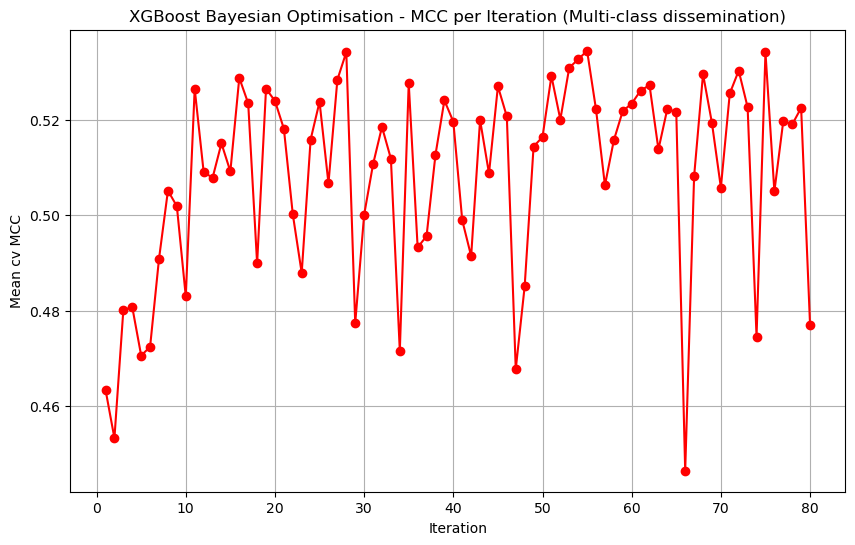

Best Parameters: OrderedDict([('gamma', 1.0), ('learning_rate', 0.05), ('max_depth', 14), ('n_estimators', 600), ('reg_alpha', 0.0), ('reg_lambda', 0.0)])
Best MCC Score (highest mean cv score from training data): 0.534482555084793
MCC (from test data): 0.5367126884736835


In [422]:
bayes_search_dissem_xgb = BayesSearchCV(
    xgb_dissem,
    search_spaces=search_space_xgb_dissem,
    n_iter=80,
    cv=cv_strategy,
    n_jobs=-1,
    scoring='matthews_corrcoef',
    random_state=20)

bayes_search_dissem_xgb.fit(X_train_dissem, y_train_dissem)

results = bayes_search_dissem_xgb.cv_results_

#Extract the iteration numbers and corresponding mean test scores
iterations = range(1, len(results['mean_test_score']) + 1)
mean_test_scores = results['mean_test_score']

#Plot the MCC for each iteration
plt.figure(figsize=(10, 6))
plt.plot(iterations, mean_test_scores, marker='o', color='red', markerfacecolor='red')
plt.xlabel('Iteration')
plt.ylabel('Mean cv MCC')
plt.title('XGBoost Bayesian Optimisation - MCC per Iteration (Multi-class dissemination)')
plt.grid(True)
plt.show()

print("Best Parameters:", bayes_search_dissem_xgb.best_params_)
print("Best MCC Score (highest mean cv score from training data):", bayes_search_dissem_xgb.best_score_)

best_y_pred_dissem_xgb = bayes_search_dissem_xgb.best_estimator_.predict(X_test_dissem)
print("MCC (from test data):", matthews_corrcoef(y_test_dissem, best_y_pred_dissem_xgb))

### Transmission optimisation (XGB)

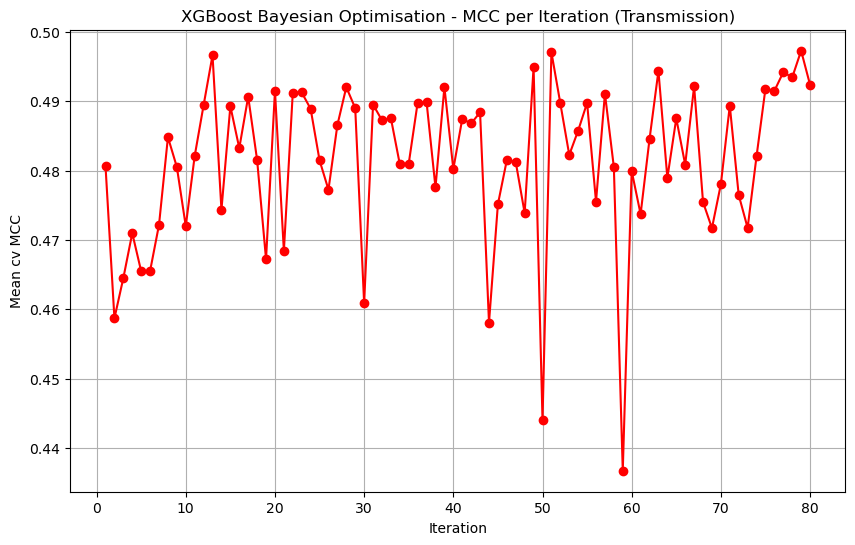

Best Parameters: OrderedDict([('gamma', 0.5154439619580173), ('learning_rate', 0.05), ('max_depth', 20), ('n_estimators', 1000), ('reg_alpha', 0.3), ('reg_lambda', 0.6)])
Best MCC Score (highest mean cv score from training data): 0.4973080998185583
MCC (from test data): 0.5186211412931897


In [325]:
bayes_search_trans_xgb = BayesSearchCV(
    xgb_trans,
    search_spaces=search_space_xgb,
    n_iter=80,
    cv=cv_strategy,
    n_jobs=-1,
    scoring='matthews_corrcoef',
    random_state=20)

bayes_search_trans_xgb.fit(X_train_trans, y_train_trans)

results = bayes_search_trans_xgb.cv_results_

#Extract the iteration numbers and corresponding mean test scores
iterations = range(1, len(results['mean_test_score']) + 1)
mean_test_scores = results['mean_test_score']

#Plot the MCC for each iteration
plt.figure(figsize=(10, 6))
plt.plot(iterations, mean_test_scores, marker='o', color='red', markerfacecolor='red')
plt.xlabel('Iteration')
plt.ylabel('Mean cv MCC')
plt.title('XGBoost Bayesian Optimisation - MCC per Iteration (Transmission)')
plt.grid(True)
plt.show()

print("Best Parameters:", bayes_search_trans_xgb.best_params_)
print("Best MCC Score (highest mean cv score from training data):", bayes_search_trans_xgb.best_score_)

best_y_pred_trans_xgb = bayes_search_trans_xgb.best_estimator_.predict(X_test_trans)
print("MCC (from test data):", matthews_corrcoef(y_test_trans, best_y_pred_trans_xgb))

The Best model for each level of competence is determined on the 
highest MCC from the test data. These are as follows:

Infection- XGBoost, MCC of 0.576

Dissemination- XGBoost, MCC of 0.537

Transmission- XGBoost, MCC of 0.519

In [458]:
opt_xgb_infect = bayes_search_infect_xgb.best_estimator_#assigns the best estimator, trained using the best hyperparameters
#fit the model on training data
opt_xgb_infect.fit(X_train_infect, y_train_infect)

opt_y_predict_infect = opt_xgb_infect.predict(X_test_infect)
#uses probability for AUC
opt_xgb_y_predict_infect_prob = opt_xgb_infect.predict_proba(X_test_infect)

print(f'XGBoost Infection\n{classification_report(y_test_infect, opt_y_predict_infect)}')
print('MCC:', matthews_corrcoef(y_test_infect, opt_y_predict_infect))
print('AUC:', roc_auc_score(y_test_infect_auc, opt_xgb_y_predict_infect_prob, multi_class='ovo'))

#the cross validated sores show the MCC calculated from training in each fold, showing how robust the model is
cv_scores_xgb_infect = cross_val_score(opt_xgb_infect, X_train_infect, y_train_infect, cv=cv_strategy, scoring='matthews_corrcoef')

cv_std_xgb_infect = cv_scores_xgb_infect.std() #saved for plotting later
print('Training cross validation MCC scores for each fold:', cv_scores_xgb_infect)
print('Mean training cross validation MCC:', cv_scores_xgb_infect.mean())
print('Standard deviation for MCC across cv folds:', cv_std_xgb_infect)

XGBoost Infection
              precision    recall  f1-score   support

           0       0.71      0.53      0.60       218
           1       0.68      0.65      0.67       607
           2       0.81      0.88      0.84       946

    accuracy                           0.76      1771
   macro avg       0.73      0.69      0.70      1771
weighted avg       0.75      0.76      0.75      1771

MCC: 0.5761783154695435
AUC: 0.8757488272615855
Training cross validation MCC scores for each fold: [0.54784242 0.54902198 0.53250788 0.59117961 0.5476791 ]
Mean training cross validation MCC: 0.5536461982269134
Standard deviation for MCC across cv folds: 0.01972946594860326


In [463]:
opt_rf_infect = bayes_search_infect_rf.best_estimator_#assigns the best estimator, trained using the best hyperparameters
#fit the model on training data
opt_rf_infect.fit(X_train_infect, y_train_infect)

opt_y_predict_infect = opt_rf_infect.predict(X_test_infect)
#uses probability for AUC
opt_rf_y_predict_infect_prob = opt_rf_infect.predict_proba(X_test_infect)

print(f'Random Forest Infection\n{classification_report(y_test_infect, opt_y_predict_infect)}')
print('MCC:', matthews_corrcoef(y_test_infect, opt_y_predict_infect))
print('AUC:', roc_auc_score(y_test_infect_auc, opt_rf_y_predict_infect_prob, multi_class='ovo'))

#the cross validated sores show the MCC calculated from training in each fold, showing how robust the model is
cv_scores_rf_infect = cross_val_score(opt_rf_infect, X_train_infect, y_train_infect, cv=cv_strategy, scoring='matthews_corrcoef')

cv_std_rf_infect = cv_scores_rf_infect.std() #saved for plotting later
print('Training cross validation MCC scores for each fold:', cv_scores_rf_infect)
print('Mean training cross validation MCC:', cv_scores_rf_infect.mean())
print('Standard deviation for MCC across cv folds:', cv_std_rf_infect)

Random Forest Infection
              precision    recall  f1-score   support

           0       0.69      0.51      0.59       218
           1       0.68      0.63      0.65       607
           2       0.80      0.88      0.84       946

    accuracy                           0.75      1771
   macro avg       0.72      0.67      0.69      1771
weighted avg       0.74      0.75      0.74      1771

MCC: 0.5612930614570303
AUC: 0.8754521059213224
Training cross validation MCC scores for each fold: [0.57625634 0.5192712  0.54468263 0.56665661 0.53976775]
Mean training cross validation MCC: 0.5493269082255504
Standard deviation for MCC across cv folds: 0.020207946910979158


In [459]:
opt_xgb_dissem = bayes_search_dissem_xgb.best_estimator_#assigns the best estimator, trained using the best hyperparameters
#fit the model on training data
opt_xgb_dissem.fit(X_train_dissem, y_train_dissem)

opt_y_predict_dissem = opt_xgb_dissem.predict(X_test_dissem)
#uses probability for AUC
opt_xgb_y_predict_dissem_prob = opt_xgb_dissem.predict_proba(X_test_dissem)

print(f'XGBoost Dissemination\n{classification_report(y_test_dissem, opt_y_predict_dissem)}')
print('MCC:', matthews_corrcoef(y_test_dissem, opt_y_predict_dissem))
print('AUC:', roc_auc_score(y_test_dissem_auc, opt_xgb_y_predict_dissem_prob, multi_class='ovo'))

#the cross validated sores show the MCC calculated from training in each fold, showing how robust the model is
cv_scores_xgb_dissem = cross_val_score(opt_xgb_dissem, X_train_infect, y_train_infect, cv=cv_strategy, scoring='matthews_corrcoef')

cv_std_xgb_dissem = cv_scores_xgb_dissem.std() #saved for plotting later
print('Training cross validation MCC scores for each fold:', cv_scores_xgb_dissem)
print('Mean training cross validation MCC:', cv_scores_xgb_dissem.mean())
print('Standard deviation for MCC across cv folds:', cv_std_xgb_dissem)

XGBoost Dissemination
              precision    recall  f1-score   support

           0       0.72      0.63      0.68       251
           1       0.59      0.47      0.52       264
           2       0.78      0.88      0.83       662

    accuracy                           0.74      1177
   macro avg       0.70      0.66      0.68      1177
weighted avg       0.73      0.74      0.73      1177

MCC: 0.5367126884736835
AUC: 0.854791587262775
Training cross validation MCC scores for each fold: [0.55086258 0.50267592 0.54671499 0.5570873  0.54619407]
Mean training cross validation MCC: 0.5407069710362393
Standard deviation for MCC across cv folds: 0.019411423927057032


In [465]:
opt_rf_dissem = bayes_search_dissem_rf.best_estimator_#assigns the best estimator, trained using the best hyperparameters
#fit the model on training data
opt_rf_dissem.fit(X_train_dissem, y_train_dissem)

opt_y_predict_dissem = opt_rf_dissem.predict(X_test_dissem)
#uses probability for AUC
opt_rf_y_predict_dissem_prob = opt_rf_dissem.predict_proba(X_test_dissem)

print(f'Random Forest Dissemination\n{classification_report(y_test_dissem, opt_y_predict_dissem)}')
print('MCC:', matthews_corrcoef(y_test_dissem, opt_y_predict_dissem))
print('AUC:', roc_auc_score(y_test_dissem_auc, opt_rf_y_predict_dissem_prob, multi_class='ovo'))

#the cross validated sores show the MCC calculated from training in each fold, showing how robust the model is
cv_scores_rf_dissem = cross_val_score(opt_rf_dissem, X_train_infect, y_train_infect, cv=cv_strategy, scoring='matthews_corrcoef')

cv_std_rf_dissem = cv_scores_rf_dissem.std() #saved for plotting later
print('Training cross validation MCC scores for each fold:', cv_scores_rf_dissem)
print('Mean training cross validation MCC:', cv_scores_rf_dissem.mean())
print('Standard deviation for MCC across cv folds:', cv_std_rf_dissem)

Random Forest Dissemination
              precision    recall  f1-score   support

           0       0.73      0.65      0.68       251
           1       0.56      0.47      0.51       264
           2       0.79      0.87      0.82       662

    accuracy                           0.73      1177
   macro avg       0.69      0.66      0.67      1177
weighted avg       0.72      0.73      0.72      1177

MCC: 0.5300021811405198
AUC: 0.8602167008101995
Training cross validation MCC scores for each fold: [0.57070632 0.51045673 0.55013051 0.53944095 0.5465665 ]
Mean training cross validation MCC: 0.5434602041992689
Standard deviation for MCC across cv folds: 0.019503211619013607


In [460]:
opt_xgb_trans = bayes_search_trans_xgb.best_estimator_#assigns the best estimator, trained using the best hyperparameters
#fit the model on training data
opt_xgb_trans.fit(X_train_trans, y_train_trans)

opt_y_predict_trans = opt_xgb_trans.predict(X_test_trans)
#uses probability for AUC
opt_xgb_y_predict_trans_prob = opt_xgb_trans.predict_proba(X_test_trans)

print(f'XGBoost Transmission\n{classification_report(y_test_trans, opt_y_predict_trans)}')
print('MCC:', matthews_corrcoef(y_test_trans, opt_y_predict_trans))
print('AUC:', roc_auc_score(y_test_trans_auc, opt_xgb_y_predict_trans_prob, multi_class='ovo'))

#the cross validated sores show the MCC calculated from training in each fold, showing how robust the model is
cv_scores_xgb_trans = cross_val_score(opt_xgb_trans, X_train_infect, y_train_infect, cv=cv_strategy, scoring='matthews_corrcoef')

cv_std_xgb_trans = cv_scores_xgb_trans.std() #saved for plotting later
print('Training cross validation MCC scores for each fold:', cv_scores_xgb_trans)
print('Mean training cross validation MCC:', cv_scores_xgb_trans.mean())
print('Standard deviation for MCC across cv folds:', cv_std_xgb_trans)

XGBoost Transmission
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       338
           1       0.63      0.77      0.69       322
           2       0.72      0.52      0.60       161

    accuracy                           0.69       821
   macro avg       0.71      0.67      0.68       821
weighted avg       0.70      0.69      0.69       821

MCC: 0.5186211412931897
AUC: 0.8473591152232715
Training cross validation MCC scores for each fold: [0.56797311 0.52198283 0.52474003 0.5664735  0.53971214]
Mean training cross validation MCC: 0.5441763231687456
Standard deviation for MCC across cv folds: 0.019767147432064463


In [462]:
opt_rf_trans = bayes_search_trans_rf.best_estimator_#assigns the best estimator, trained using the best hyperparameters
#fit the model on training data
opt_rf_trans.fit(X_train_trans, y_train_trans)

opt_y_predict_trans = opt_rf_trans.predict(X_test_trans)
#uses probability for AUC
opt_rf_y_predict_trans_prob = opt_rf_trans.predict_proba(X_test_trans)

print(f'Random Forest Transmission\n{classification_report(y_test_trans, opt_y_predict_trans)}')
print('MCC:', matthews_corrcoef(y_test_trans, opt_y_predict_trans))
print('AUC:', roc_auc_score(y_test_trans_auc, opt_rf_y_predict_trans_prob, multi_class='ovo'))

#the cross validated sores show the MCC calculated from training in each fold, showing how robust the model is
cv_scores_rf_trans = cross_val_score(opt_rf_trans, X_train_infect, y_train_infect, cv=cv_strategy, scoring='matthews_corrcoef')

cv_std_rf_trans = cv_scores_rf_trans.std() #saved for plotting later
print('Training cross validation MCC scores for each fold:', cv_scores_rf_trans)
print('Mean training cross validation MCC:', cv_scores_rf_trans.mean())
print('Standard deviation for MCC across cv folds:', cv_std_rf_trans)

Random Forest Transmission
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       338
           1       0.61      0.79      0.69       322
           2       0.71      0.48      0.57       161

    accuracy                           0.69       821
   macro avg       0.71      0.66      0.67       821
weighted avg       0.71      0.69      0.69       821

MCC: 0.5191842087273532
AUC: 0.8522153599430227
Training cross validation MCC scores for each fold: [0.5269912  0.47107029 0.50649313 0.50692474 0.47286189]
Mean training cross validation MCC: 0.4968682503268977
Standard deviation for MCC across cv folds: 0.02164718858975235


### Plotting cv std for training data

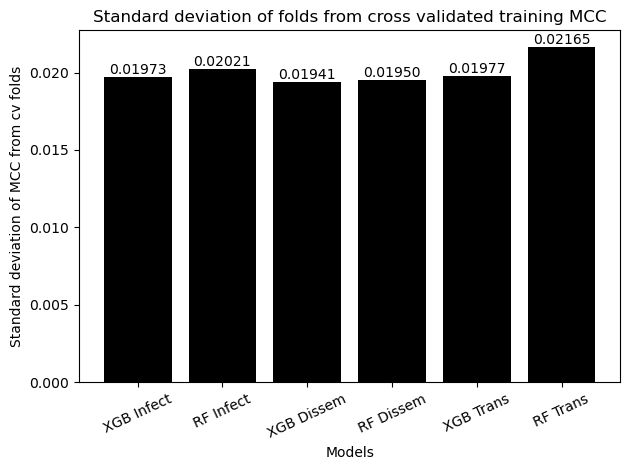

In [476]:
cv_std_data = {
    'XGB Infect': [cv_std_xgb_infect],
    'RF Infect': [cv_std_rf_infect],
    'XGB Dissem': [cv_std_xgb_dissem],
    'RF Dissem': [cv_std_rf_dissem],
    'XGB Trans': [cv_std_xgb_trans],
    'RF Trans': [cv_std_rf_trans]
}

cv_std_df = pd.DataFrame(cv_std_data)
bar_titles_cv_std = cv_std_df.columns
bar_values_cv_std = cv_std_df.iloc[0]

cv_bars = plt.bar(bar_titles_cv_std, bar_values_cv_std, color='black')

plt.bar_label(cv_bars, fmt='%.5f', color='black') #fmt='%.5f'- print up to 5 decimal places
plt.xlabel('Models')
plt.ylabel('Standard deviation of MCC from cv folds')
plt.title('Standard deviation of folds from cross validated training MCC')
plt.xticks(rotation=25)
plt.tight_layout()

plt.show()

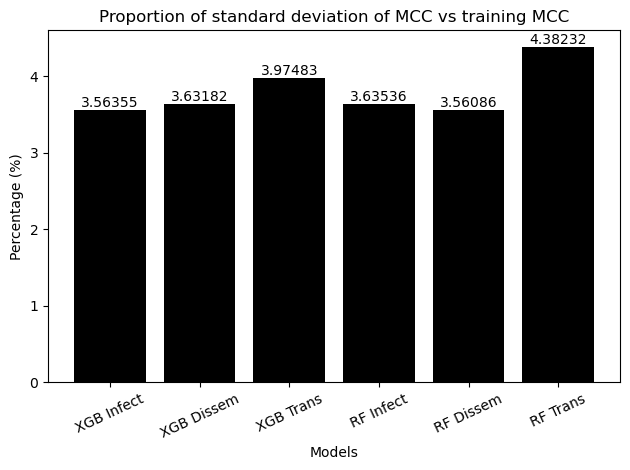

   XGB Infect  XGB Dissem  XGB Trans  RF Infect  RF Dissem  RF Trans
0    3.563551    3.631816   3.974829   3.635357   3.560861  4.382319


In [490]:
'''
To get a proper value of the variation, the standard devation must be thought of as a percentage of the mean from which the values average to.
'''


cv_std_xgb_infect_perc = (cv_std_xgb_infect / bayes_search_infect_xgb.best_score_)*100
cv_std_xgb_dissem_perc = (cv_std_xgb_dissem / bayes_search_dissem_xgb.best_score_)*100
cv_std_xgb_trans_perc = (cv_std_xgb_trans / bayes_search_trans_xgb.best_score_)*100
cv_std_rf_infect_perc = (cv_std_rf_infect / bayes_search_infect_rf.best_score_)*100
cv_std_rf_dissem_perc = (cv_std_rf_dissem / bayes_search_dissem_rf.best_score_)*100
cv_std_rf_trans_perc = (cv_std_rf_trans / bayes_search_trans_rf.best_score_)*100

cv_std_perc_data = {
    'XGB Infect': [cv_std_xgb_infect_perc],
    'XGB Dissem': [cv_std_xgb_dissem_perc],
    'XGB Trans': [cv_std_xgb_trans_perc],
    'RF Infect': [cv_std_rf_infect_perc],
    'RF Dissem': [cv_std_rf_dissem_perc],
    'RF Trans': [cv_std_rf_trans_perc]
}


cv_std_perc_df = pd.DataFrame(cv_std_perc_data)
bar_titles_cv_std_perc = cv_std_perc_df.columns
bar_values_cv_std_perc = cv_std_perc_df.iloc[0]

cv_perc_bars = plt.bar(bar_titles_cv_std_perc, bar_values_cv_std_perc, color='black')

plt.bar_label(cv_perc_bars, fmt='%.5f', color='black') #fmt='%.5f'- print up to 5 decimal places
plt.xlabel('Models')
plt.ylabel('Percentage (%)')
plt.title('Proportion of standard deviation of MCC vs training MCC')
plt.xticks(rotation=25)
plt.tight_layout()

plt.show()
print(cv_std_perc_df)


## SHAP Variable importance

### Infection: XGBoost version

In [ ]:
import shap

#using shap library which is able to calculate scores for feature importance for individual classes
xgb_infect_explainer = shap.TreeExplainer(opt_xgb_infect) #initialises an explainer for the opt_xgb_infect model 
xgb_infect_shap_values = xgb_infect_explainer(X_train_infect)#uses the training data data to examine feature importance

#extracting the shap values for every instance, feature and class
xgb_infect_shap_values_array = xgb_infect_shap_values.values

#verifying the shape of the shap values, which should be 178x3 for 178 features and 3 classes
print(f"Type of shap_values: {type(xgb_infect_shap_values)}")
print(f"Shape of shap_values for class 0: {np.shape(xgb_infect_shap_values[0])}")
print(f"Shape of shap_values for class 1: {np.shape(xgb_infect_shap_values[1])}")
print(f"Shape of shap_values for class 2: {np.shape(xgb_infect_shap_values[2])}")
print(f"Shape of shap_values {np.shape(xgb_infect_shap_values)}")

#calculating the mean for each feature out of all instances in each class
xgb_infect_mean_shap_values = np.abs(xgb_infect_shap_values_array).mean(axis=0)

xgb_infect_feature_importance_df = pd.DataFrame(
    xgb_infect_mean_shap_values,
    columns=["Class 0", "Class 1", "Class 2"],
    index=X_test_infect.columns #feature names used as index
)

print(xgb_infect_feature_importance_df.head(20)) #mean shap feature importance scores across all classes

#class specific shap feature importance scores
class_0_xgb_infect_shap_scores = xgb_infect_feature_importance_df['Class 0']
class_1_xgb_infect_shap_scores = xgb_infect_feature_importance_df['Class 1']
class_2_xgb_infect_shap_scores = xgb_infect_feature_importance_df['Class 2']

class_0_xgb_infect_shap_scores_top_20 = class_0_xgb_infect_shap_scores.nlargest(20)
print('20 most important features of xgb_infect Class 0:')
print(class_0_xgb_infect_shap_scores_top_20)
class_1_xgb_infect_shap_scores_top_20 = class_1_xgb_infect_shap_scores.nlargest(20)
print('20 most important features of xgb_infect Class 1:')
print(class_1_xgb_infect_shap_scores_top_20)
class_2_xgb_infect_shap_scores_top_20 = class_2_xgb_infect_shap_scores.nlargest(20)
print('20 most important features of xgb_infect Class 2:')
print(class_2_xgb_infect_shap_scores_top_20)

Type of shap_values: <class 'shap._explanation.Explanation'>
Shape of shap_values for class 0: (178, 3)
Shape of shap_values for class 1: (178, 3)
Shape of shap_values for class 2: (178, 3)
Shape of shap_values (4130, 178, 3)
                                          Class 0   Class 1   Class 2
virus.class_Alphamesonivirus             0.000000  0.000000  0.000000
virus.class_Alphavirus                   0.002605  0.085001  0.042116
virus.class_Ephemerovirus                0.000754  0.000000  0.000000
virus.class_Orbivirus                    0.000000  0.000000  0.000000
virus.class_Orthobunyavirus              0.000990  0.000060  0.002121
virus.class_Orthoflavivirus              0.003592  0.000192  0.001771
virus.class_Phlebovirus                  0.000043  0.002955  0.000000
virus.class_Sunrhavirus                  0.000000  0.000000  0.000000
virus.class_Unclassified Flaviviridae    0.000000  0.000000  0.000000
virus.class_unclassified Flavivirus      0.000404  0.000000  0.000000
viru

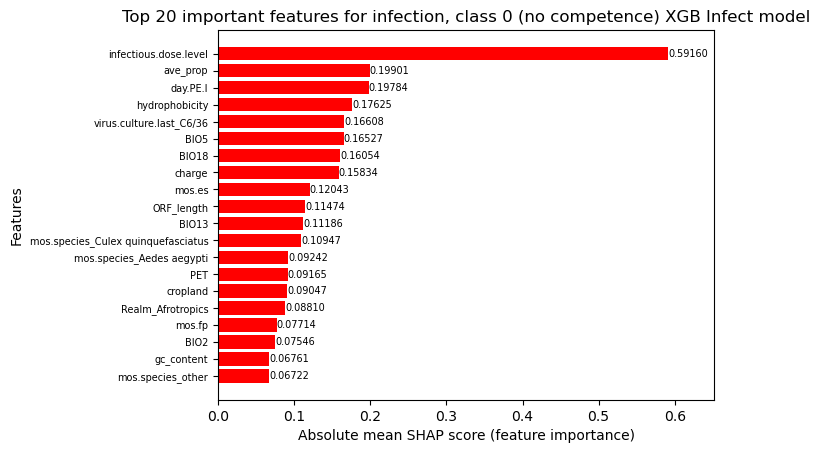

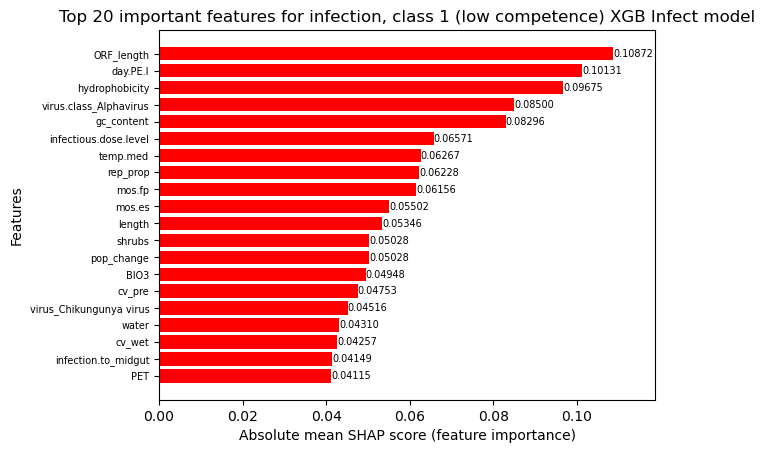

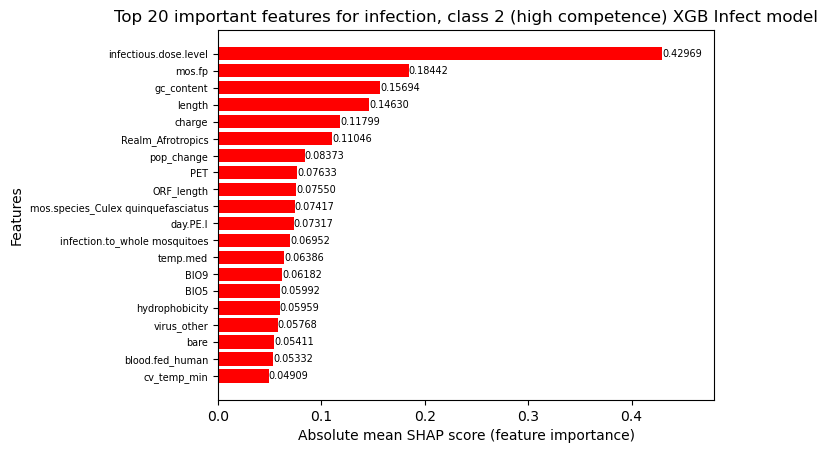

In [614]:


bars_xgb_infect_shap_bars_class_0 = plt.barh(class_0_xgb_infect_shap_scores_top_20.index, class_0_xgb_infect_shap_scores_top_20.values, color='red')
plt.bar_label(bars_xgb_infect_shap_bars_class_0,  fmt='%.5f', color='black', fontsize=7)#fmt- decimal places of value label
plt.xlabel('Absolute mean SHAP score (feature importance)')
plt.xlim(0, max(class_0_xgb_infect_shap_scores_top_20.values)+0.06)#label was overlapping the edge of the graph so the x limit had to be increased
plt.ylabel('Features')
plt.title('Top 20 important features for infection, class 0 (no competence) XGB Infect model')
plt.yticks(fontsize=7)
plt.gca().invert_yaxis()

plt.show()

bars_xgb_infect_shap_bars_class_1 = plt.barh(class_1_xgb_infect_shap_scores_top_20.index, class_1_xgb_infect_shap_scores_top_20.values, color='red')
plt.bar_label(bars_xgb_infect_shap_bars_class_1, fmt='%.5f', color='black', fontsize=7)#fmt- decimal places of value label
plt.xlabel('Absolute mean SHAP score (feature importance)')
plt.xlim(0, max(class_1_xgb_infect_shap_scores_top_20.values)+0.01)#label was overlapping the edge of the graph so the x limit had to be increased
plt.ylabel('Features')
plt.title('Top 20 important features for infection, class 1 (low competence) XGB Infect model')
plt.yticks(fontsize=7)
plt.gca().invert_yaxis()

plt.show()

bars_xgb_infect_shap_bars_class_2 = plt.barh(class_2_xgb_infect_shap_scores_top_20.index, class_2_xgb_infect_shap_scores_top_20.values, color='red')
plt.bar_label(bars_xgb_infect_shap_bars_class_2, fmt='%.5f', color='black', fontsize=7)#fmt- decimal places of value label
plt.xlabel('Absolute mean SHAP score (feature importance)')
plt.xlim(0, max(class_2_xgb_infect_shap_scores_top_20.values)+0.05)#label was overlapping the edge of the graph so the x limit had to be increased
plt.ylabel('Features')
plt.title('Top 20 important features for infection, class 2 (high competence) XGB Infect model')
plt.yticks(fontsize=7)
plt.gca().invert_yaxis()

plt.show()

Class 0 summary plot:


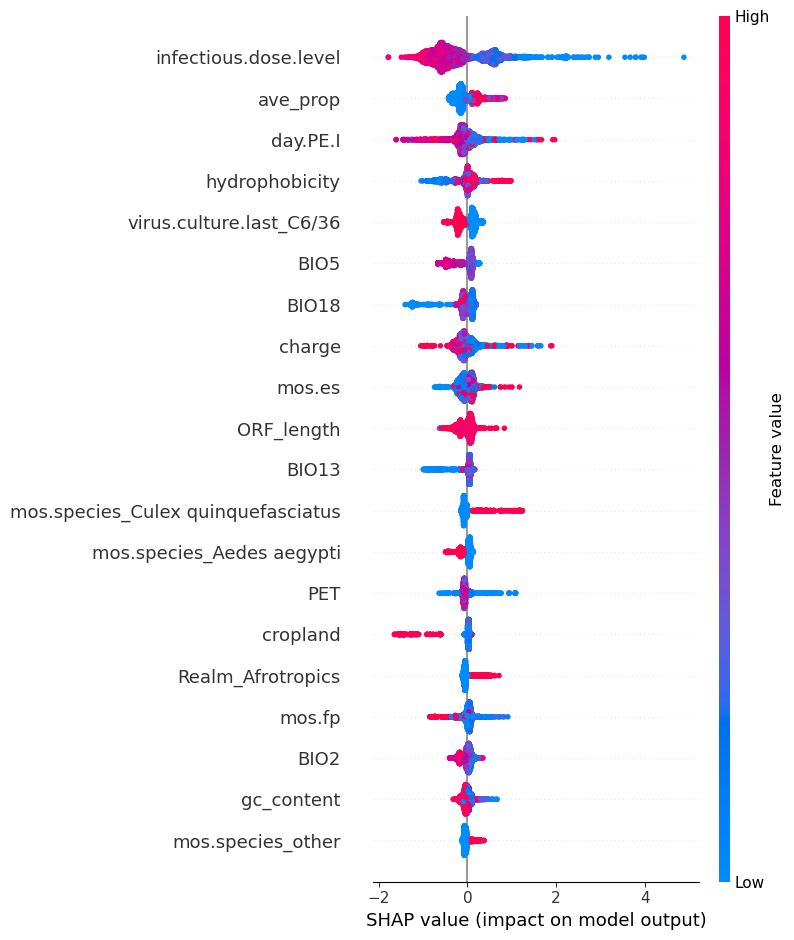

Class 1 summary plot:


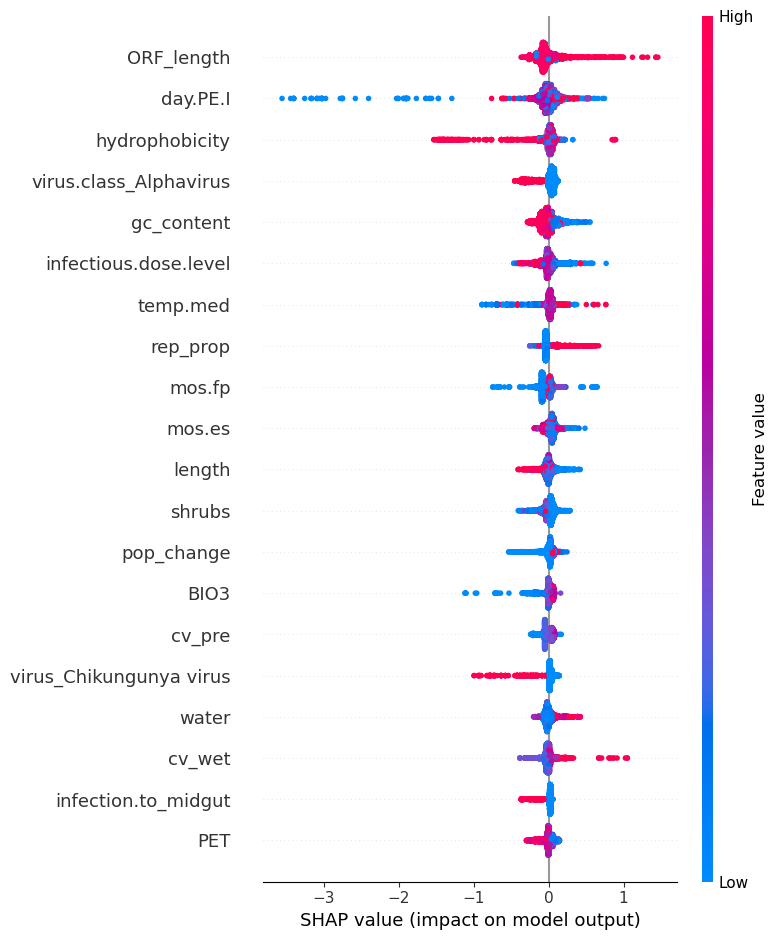

Class 2 summary plot:


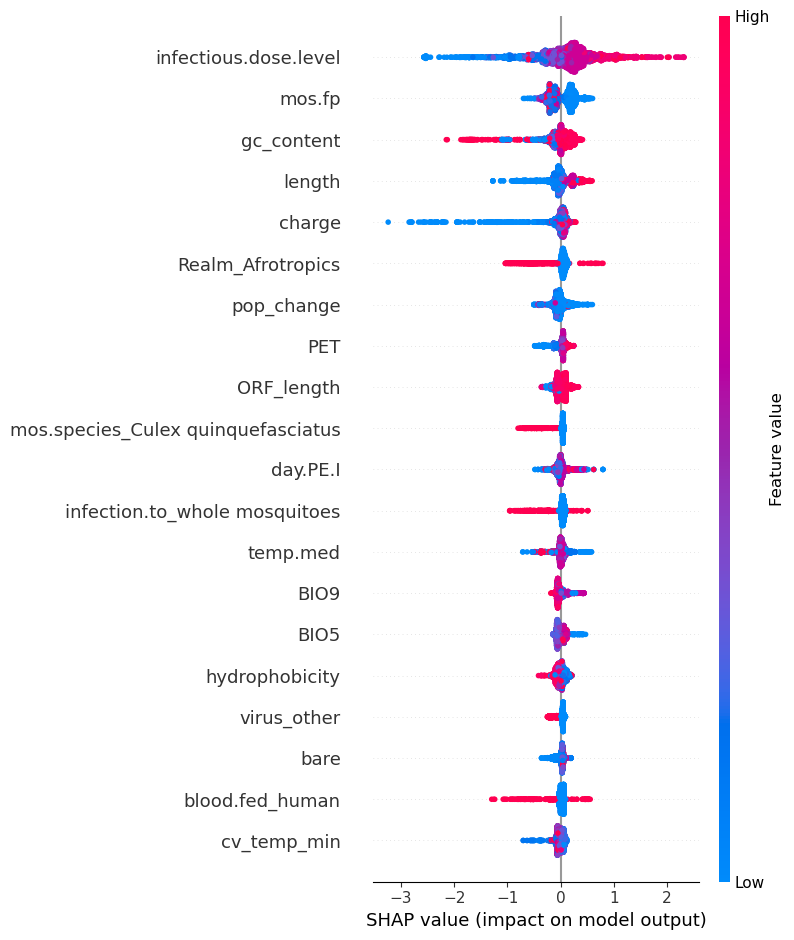

In [596]:
'''
Summary plots from shap shows the distribution of instances in terms of SHAP score for each class.
'''
#class 0
print('Class 0 summary plot:')
shap.summary_plot(
    shap_values=xgb_infect_shap_values[..., 0], #accessing the all instances from the first index (class 0)
    features = X_train_infect,
    feature_names = X_train_infect.columns,
    plot_type='dot'
)
#class 1
print('Class 1 summary plot:')
shap.summary_plot(
    shap_values=xgb_infect_shap_values[..., 1], #accessing the all instances from the second index (class 1)
    features = X_train_infect,
    feature_names = X_train_infect.columns,
    plot_type='dot'
)
#class 2
print('Class 2 summary plot:')
shap.summary_plot(
    shap_values=xgb_infect_shap_values[..., 2], #accessing the all instances from the third index (class 2)
    features = X_train_infect,
    feature_names = X_train_infect.columns,
    plot_type='dot'
)

### Dissemination: XGBoost version

In [ ]:
#using shap library which is able to calculate scores for feature importance for individual classes
xgb_dissem_explainer = shap.TreeExplainer(opt_xgb_dissem) #initialises an explainer for the opt_xgb_dissem model 
xgb_dissem_shap_values = xgb_dissem_explainer(X_train_dissem) #using the training data to examine feature importance

#extracting the shap values for every instance, feature and class
xgb_dissem_shap_values_array = xgb_dissem_shap_values.values

#calculating the mean for each feature out of all instances in each class
xgb_dissem_mean_shap_values = np.abs(xgb_dissem_shap_values_array).mean(axis=0)

xgb_dissem_feature_importance_df = pd.DataFrame(
    xgb_dissem_mean_shap_values,
    columns=["Class 0", "Class 1", "Class 2"],
    index=X_test_dissem.columns #feature names used as index
)

#class specific shap feature importance scores
class_0_xgb_dissem_shap_scores = xgb_dissem_feature_importance_df['Class 0']
class_1_xgb_dissem_shap_scores = xgb_dissem_feature_importance_df['Class 1']
class_2_xgb_dissem_shap_scores = xgb_dissem_feature_importance_df['Class 2']

class_0_xgb_dissem_shap_scores_top_20 = class_0_xgb_dissem_shap_scores.nlargest(20)
print('20 most important features of xgb_dissem Class 0:')
print(class_0_xgb_dissem_shap_scores_top_20)
class_1_xgb_dissem_shap_scores_top_20 = class_1_xgb_dissem_shap_scores.nlargest(20)
print('20 most important features of xgb_dissem Class 1:')
print(class_1_xgb_dissem_shap_scores_top_20)
class_2_xgb_dissem_shap_scores_top_20 = class_2_xgb_dissem_shap_scores.nlargest(20)
print('20 most important features of xgb_dissem Class 2:')
print(class_2_xgb_dissem_shap_scores_top_20)

20 most important features of xgb_dissem Class 0:
day.PE.D                     0.242859
hydrophobicity               0.176581
infectious.dose.level        0.118173
ORF_length                   0.095911
charge                       0.089080
mos.species_Aedes aegypti    0.078482
cv_wet                       0.076623
length                       0.063771
temp.med                     0.046083
grassland                    0.044978
virus.culture.last_vero      0.041812
BIO16                        0.037119
BIO2                         0.033658
infec.assay.base_Cellular    0.032989
NPP                          0.030711
shrubs                       0.030321
gc_content                   0.030282
cv_pre                       0.028938
mam_prop                     0.028706
wetlands                     0.027084
Name: Class 0, dtype: float32
20 most important features of xgb_dissem Class 1:
BIO2                             0.177219
day.PE.D                         0.165683
BIO9                      

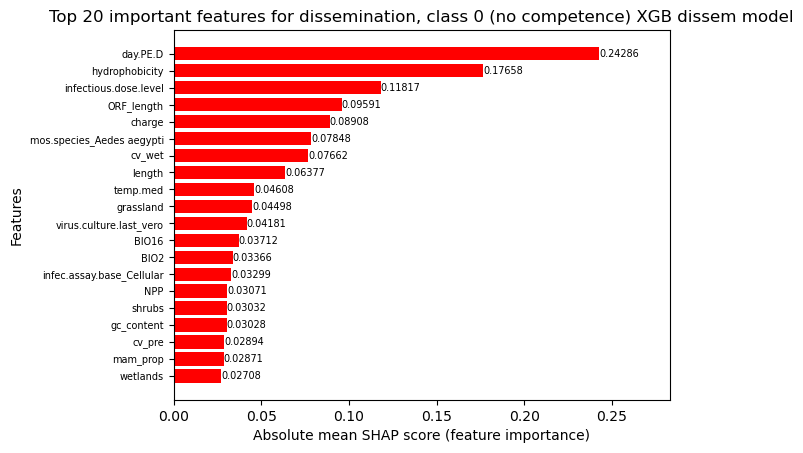

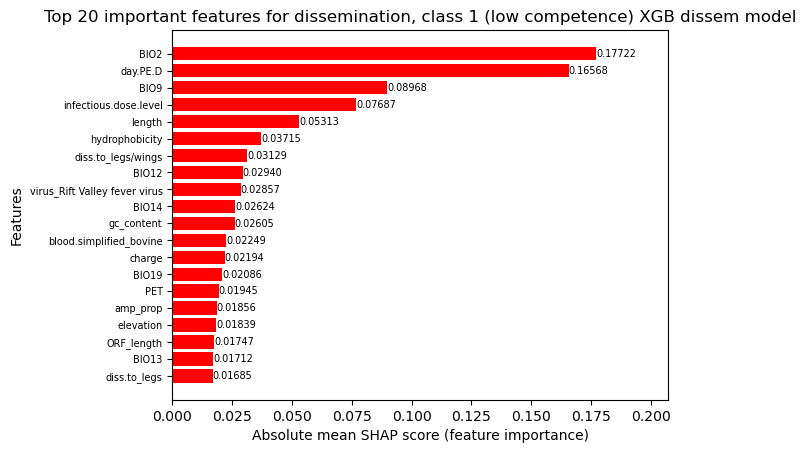

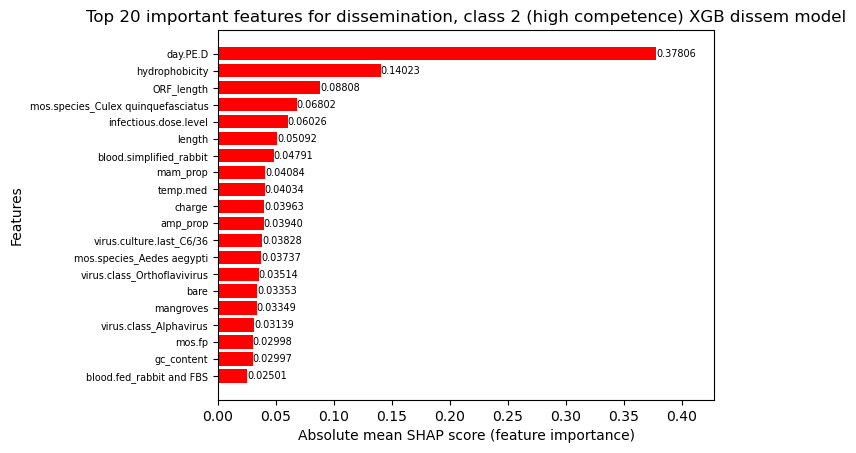

In [615]:

bars_xgb_dissem_shap_bars_class_0 = plt.barh(class_0_xgb_dissem_shap_scores_top_20.index, class_0_xgb_dissem_shap_scores_top_20.values, color='red')
plt.bar_label(bars_xgb_dissem_shap_bars_class_0,  fmt='%.5f', color='black', fontsize=7)#fmt- decimal places of value label
plt.xlabel('Absolute mean SHAP score (feature importance)')
plt.xlim(0, max(class_0_xgb_dissem_shap_scores_top_20.values)+0.04)#label was overlapping the edge of the graph so the x limit had to be increased
plt.ylabel('Features')
plt.title('Top 20 important features for dissemination, class 0 (no competence) XGB dissem model')
plt.yticks(fontsize=7)
plt.gca().invert_yaxis()

plt.show()

bars_xgb_dissem_shap_bars_class_1 = plt.barh(class_1_xgb_dissem_shap_scores_top_20.index, class_1_xgb_dissem_shap_scores_top_20.values, color='red')
plt.bar_label(bars_xgb_dissem_shap_bars_class_1, fmt='%.5f', color='black', fontsize=7)#fmt- decimal places of value label
plt.xlabel('Absolute mean SHAP score (feature importance)')
plt.xlim(0, max(class_1_xgb_dissem_shap_scores_top_20.values)+0.03)#label was overlapping the edge of the graph so the x limit had to be increased
plt.ylabel('Features')
plt.title('Top 20 important features for dissemination, class 1 (low competence) XGB dissem model')
plt.yticks(fontsize=7)
plt.gca().invert_yaxis()

plt.show()

bars_xgb_dissem_shap_bars_class_2 = plt.barh(class_2_xgb_dissem_shap_scores_top_20.index, class_2_xgb_dissem_shap_scores_top_20.values, color='red')
plt.bar_label(bars_xgb_dissem_shap_bars_class_2, fmt='%.5f', color='black', fontsize=7)#fmt- decimal places of value label
plt.xlabel('Absolute mean SHAP score (feature importance)')
plt.xlim(0, max(class_2_xgb_dissem_shap_scores_top_20.values)+0.05)#label was overlapping the edge of the graph so the x limit had to be increased
plt.ylabel('Features')
plt.title('Top 20 important features for dissemination, class 2 (high competence) XGB dissem model')
plt.yticks(fontsize=7)
plt.gca().invert_yaxis()

plt.show()

Class 0 summary plot:


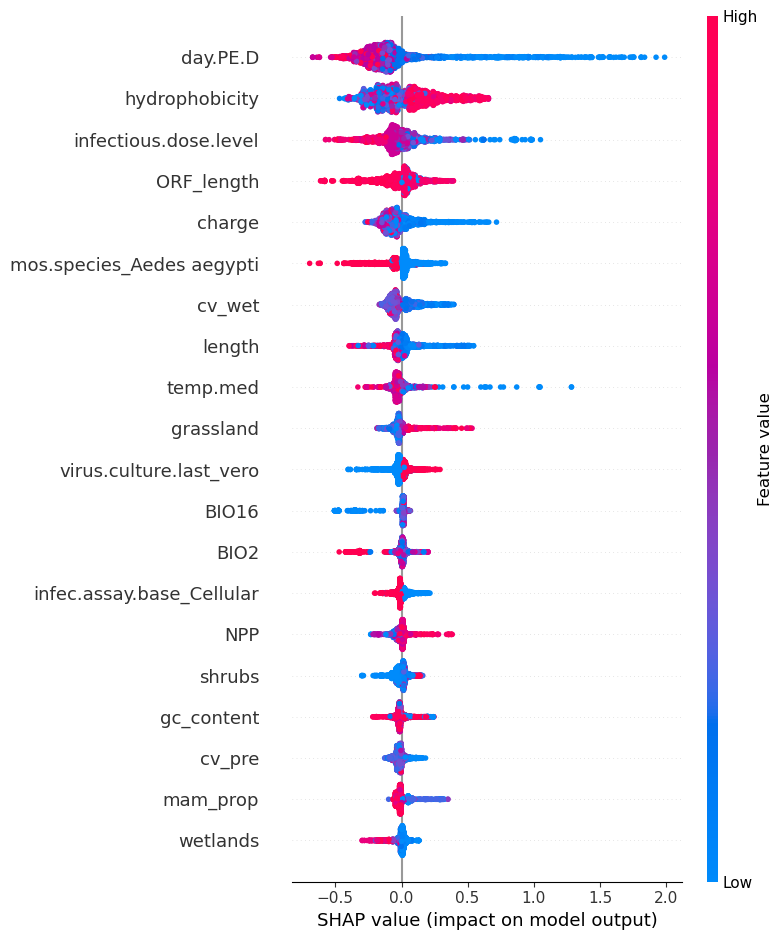

Class 1 summary plot:


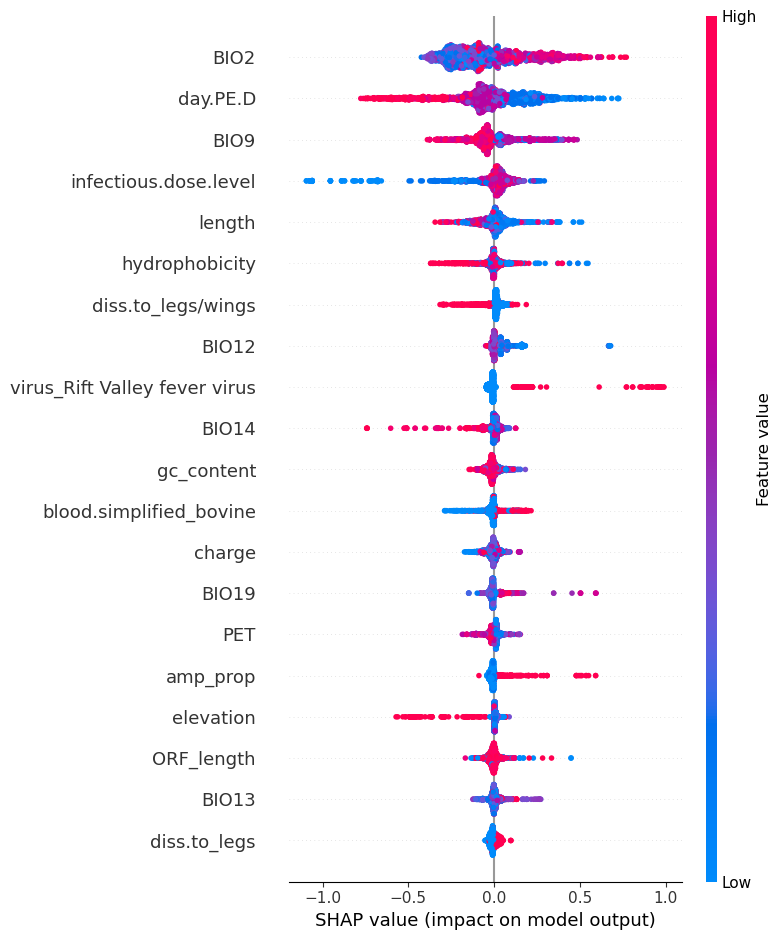

Class 2 summary plot:


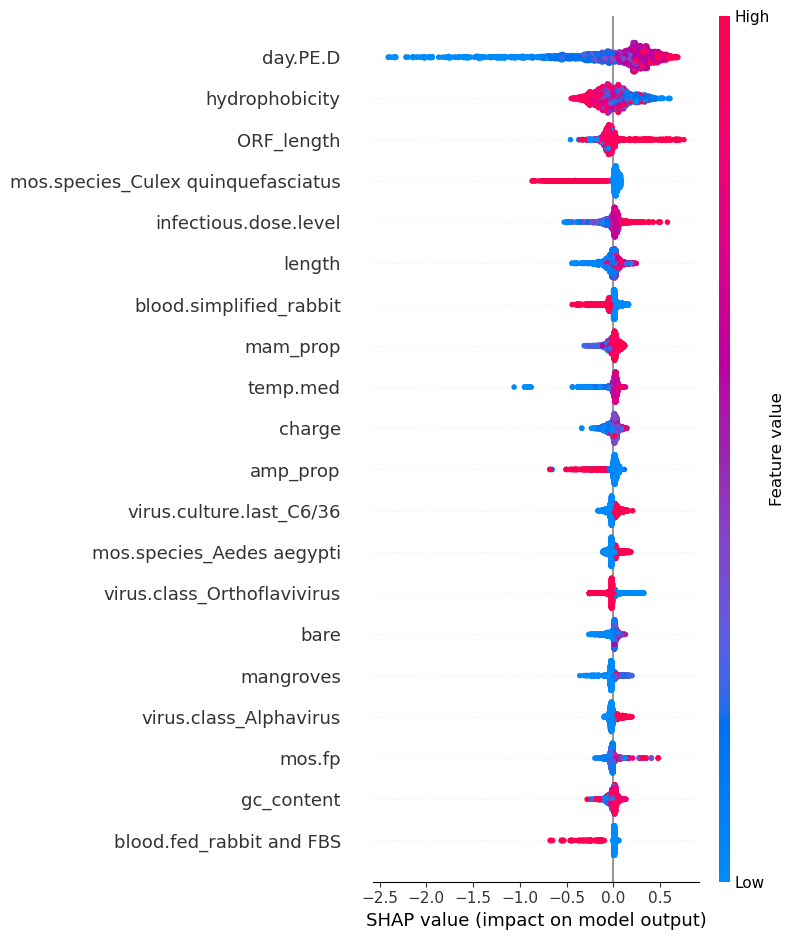

In [587]:
'''
Summary plots from shap shows the distribution of instances in terms of SHAP score through each class
'''
#class 0
print('Class 0 summary plot:')
shap.summary_plot(
    shap_values=xgb_dissem_shap_values[..., 0], #accessing the all instances from the first index (class 0)
    features = X_train_dissem,
    feature_names = X_train_dissem.columns,
    plot_type='dot'
)
#class 1
print('Class 1 summary plot:')
shap.summary_plot(
    shap_values=xgb_dissem_shap_values[..., 1], #accessing the all instances from the second index (class 1)
    features = X_train_dissem,
    feature_names = X_train_dissem.columns,
    plot_type='dot'
)
#class 2
print('Class 2 summary plot:')
shap.summary_plot(
    shap_values=xgb_dissem_shap_values[..., 2], #accessing the all instances from the third index (class 2)
    features = X_train_dissem,
    feature_names = X_train_dissem.columns,
    plot_type='dot'
)

### Transmission: XGBoost version

In [ ]:
#using shap library which is able to calculate scores for feature importance for individual classes
xgb_trans_explainer = shap.TreeExplainer(opt_xgb_trans) #initialises an explainer for the opt_xgb_trans model 
xgb_trans_shap_values = xgb_trans_explainer(X_train_trans) #using the training data to examine feature importance

#extracting the shap values for every instance, feature and class
xgb_trans_shap_values_array = xgb_trans_shap_values.values

#calculating the mean for each feature out of all instances in each class
xgb_trans_mean_shap_values = np.abs(xgb_trans_shap_values_array).mean(axis=0)

xgb_trans_feature_importance_df = pd.DataFrame(
    xgb_trans_mean_shap_values,
    columns=["Class 0", "Class 1", "Class 2"],
    index=X_test_trans.columns #feature names used as index
)

#class specific shap feature importance scores
class_0_xgb_trans_shap_scores = xgb_trans_feature_importance_df['Class 0']
class_1_xgb_trans_shap_scores = xgb_trans_feature_importance_df['Class 1']
class_2_xgb_trans_shap_scores = xgb_trans_feature_importance_df['Class 2']

class_0_xgb_trans_shap_scores_top_20 = class_0_xgb_trans_shap_scores.nlargest(20)
print('20 most important features of xgb_trans Class 0:')
print(class_0_xgb_trans_shap_scores_top_20)
class_1_xgb_trans_shap_scores_top_20 = class_1_xgb_trans_shap_scores.nlargest(20)
print('20 most important features of xgb_trans Class 1:')
print(class_1_xgb_trans_shap_scores_top_20)
class_2_xgb_trans_shap_scores_top_20 = class_2_xgb_trans_shap_scores.nlargest(20)
print('20 most important features of xgb_trans Class 2:')
print(class_2_xgb_trans_shap_scores_top_20)

20 most important features of xgb_trans Class 0:
dat.PE.T                                0.393820
hydrophobicity                          0.256455
infectious.dose.level                   0.139403
length                                  0.138353
cv_wet                                  0.134383
blood.proccessed_washed erythrocytes    0.075155
mos.es                                  0.071782
temp.med                                0.071675
charge                                  0.062536
gc_content                              0.057592
blood.fed_calf                          0.057256
ave_prop                                0.049699
mos.fp                                  0.047538
ORF_length                              0.040950
NPP_trend                               0.037864
cv_temp_min                             0.032956
wetlands                                0.031102
pop_change                              0.025917
trees                                   0.025554
mos.species_Aedes ae

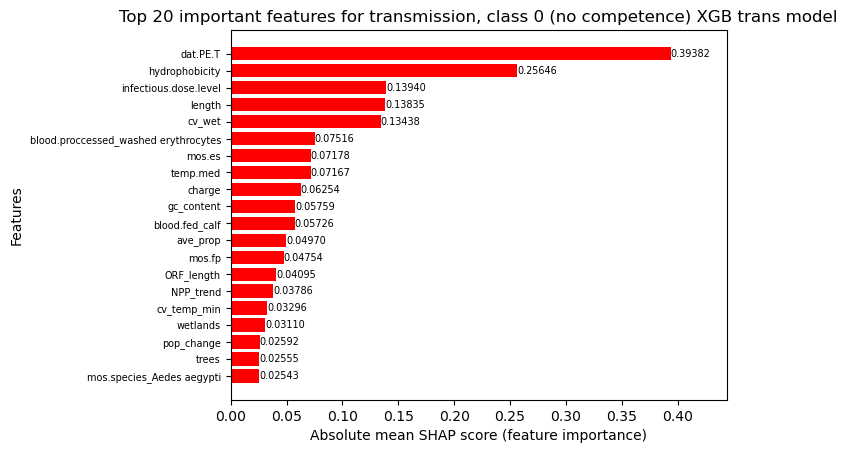

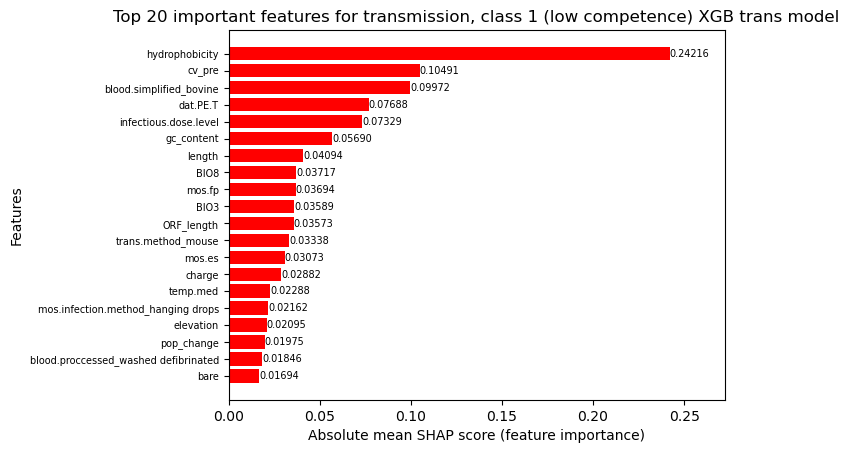

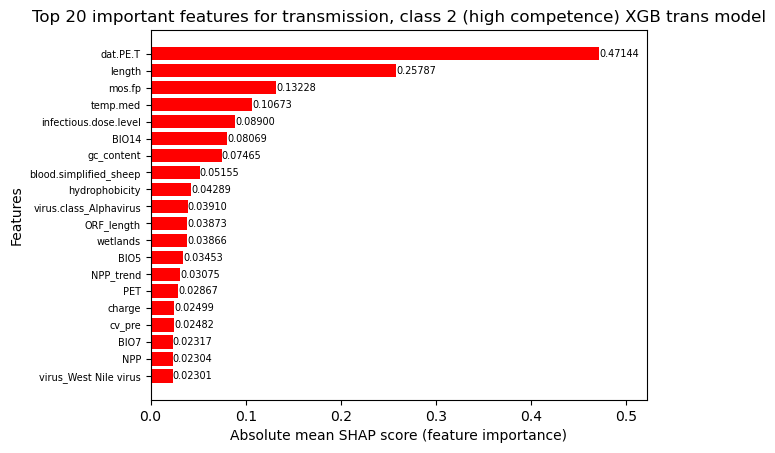

In [616]:

bars_xgb_trans_shap_bars_class_0 = plt.barh(class_0_xgb_trans_shap_scores_top_20.index, class_0_xgb_trans_shap_scores_top_20.values, color='red')
plt.bar_label(bars_xgb_trans_shap_bars_class_0,  fmt='%.5f', color='black', fontsize=7)#fmt- decimal places of value label
plt.xlabel('Absolute mean SHAP score (feature importance)')
plt.xlim(0, max(class_0_xgb_trans_shap_scores_top_20.values)+0.05)#label was overlapping the edge of the graph so the x limit had to be increased
plt.ylabel('Features')
plt.title('Top 20 important features for transmission, class 0 (no competence) XGB trans model')
plt.yticks(fontsize=7)
plt.gca().invert_yaxis()

plt.show()

bars_xgb_trans_shap_bars_class_1 = plt.barh(class_1_xgb_trans_shap_scores_top_20.index, class_1_xgb_trans_shap_scores_top_20.values, color='red')
plt.bar_label(bars_xgb_trans_shap_bars_class_1, fmt='%.5f', color='black', fontsize=7)#fmt- decimal places of value label
plt.xlabel('Absolute mean SHAP score (feature importance)')
plt.xlim(0, max(class_1_xgb_trans_shap_scores_top_20.values)+0.03)#label was overlapping the edge of the graph so the x limit had to be increased
plt.ylabel('Features')
plt.title('Top 20 important features for transmission, class 1 (low competence) XGB trans model')
plt.yticks(fontsize=7)
plt.gca().invert_yaxis()

plt.show()

bars_xgb_trans_shap_bars_class_2 = plt.barh(class_2_xgb_trans_shap_scores_top_20.index, class_2_xgb_trans_shap_scores_top_20.values, color='red')
plt.bar_label(bars_xgb_trans_shap_bars_class_2, fmt='%.5f', color='black', fontsize=7)#fmt- decimal places of value label
plt.xlabel('Absolute mean SHAP score (feature importance)')
plt.xlim(0, max(class_2_xgb_trans_shap_scores_top_20.values)+0.05)#label was overlapping the edge of the graph so the x limit had to be increased
plt.ylabel('Features')
plt.title('Top 20 important features for transmission, class 2 (high competence) XGB trans model')
plt.yticks(fontsize=7)
plt.gca().invert_yaxis()

plt.show()

Class 0 summary plot:


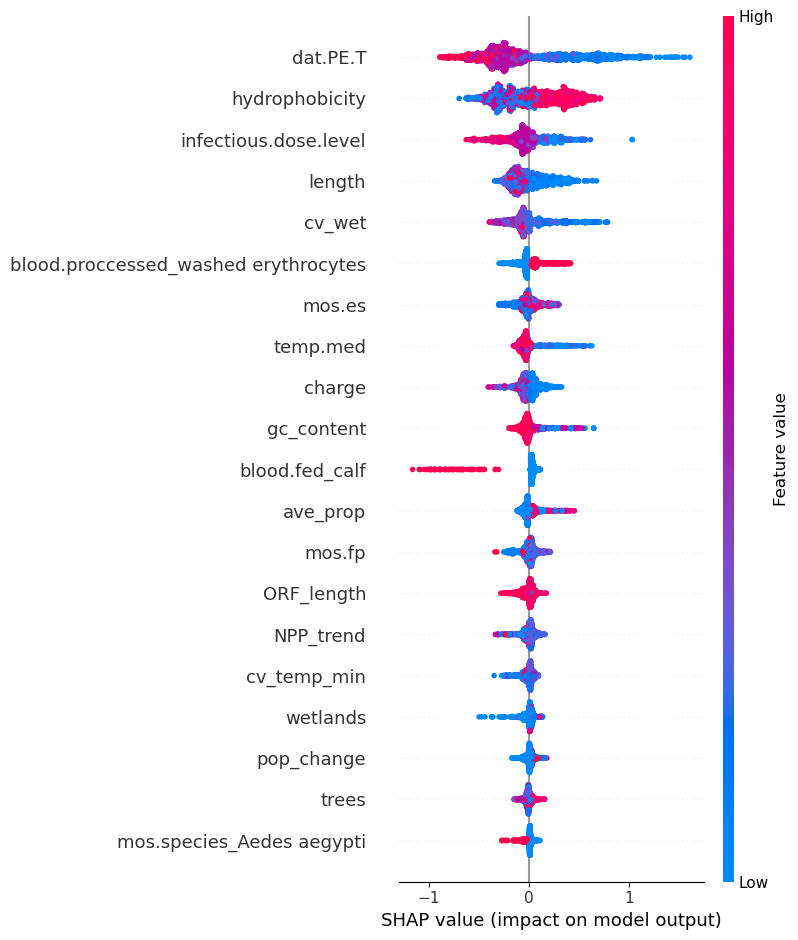

Class 1 summary plot:


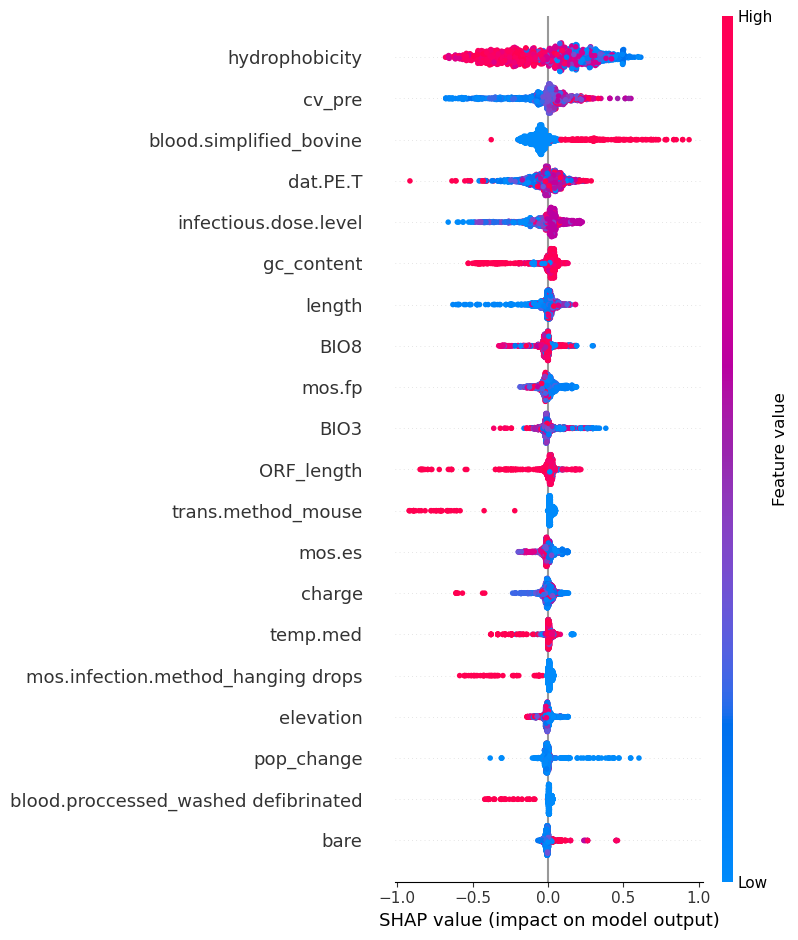

Class 2 summary plot:


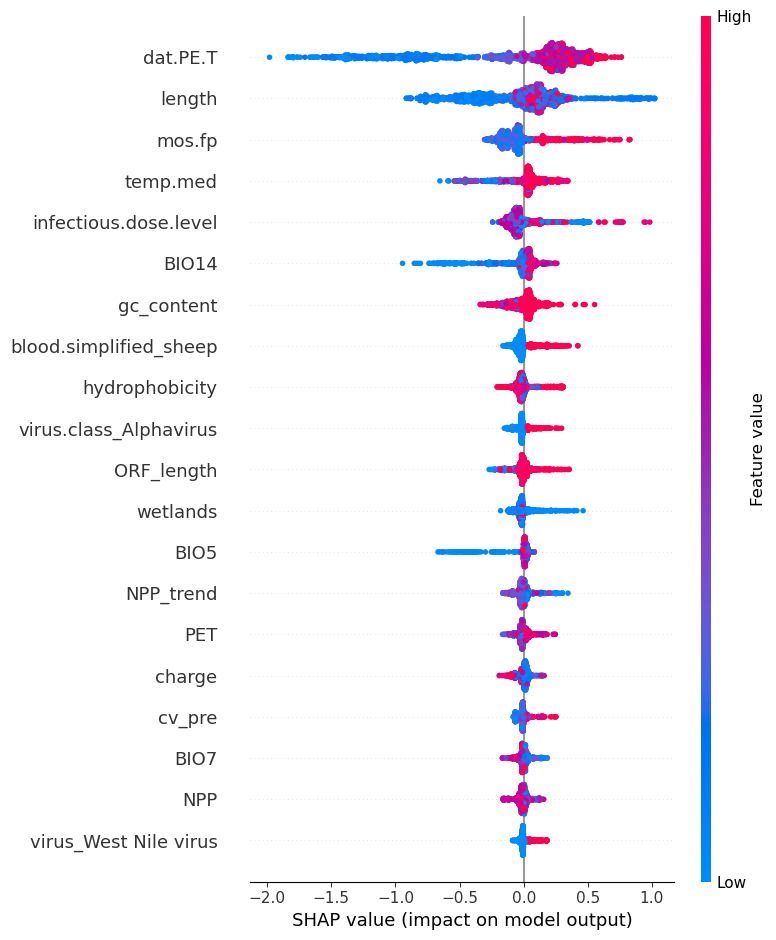

In [588]:
'''
Summary plots from shap shows the distribution of instances in terms of SHAP score for each class.
'''
#class 0
print('Class 0 summary plot:')
shap.summary_plot(
    shap_values=xgb_trans_shap_values[..., 0], #accessing the all instances from the first index (class 0)
    features = X_train_trans,
    feature_names = X_train_trans.columns,
    plot_type='dot'
)
#class 1
print('Class 1 summary plot:')
shap.summary_plot(
    shap_values=xgb_trans_shap_values[..., 1], #accessing the all instances from the second index (class 1)
    features = X_train_trans,
    feature_names = X_train_trans.columns,
    plot_type='dot'
)
#class 2
print('Class 2 summary plot:')
shap.summary_plot(
    shap_values=xgb_trans_shap_values[..., 2], #accessing the all instances from the third index (class 2)
    features = X_train_trans,
    feature_names = X_train_trans.columns,
    plot_type='dot'
)

## Further testing

In [364]:
"""
Here models will be tested further on manually assigning specific instances for
the test data, such as a specific virus or mosquito. By doing this, situations
where new viruses appear can be simulated to show how the model can be used in
real situations.
"""

virus_class_infect_count = df_infect_dropped['virus.class'].value_counts()
virus_class_dissem_count = df_dissem_dropped['virus.class'].value_counts()
virus_class_trans_count = df_trans_dropped['virus.class'].value_counts()

print(virus_class_infect_count)
print(virus_class_dissem_count)
print(virus_class_trans_count)

virus.class
Orthoflavivirus              4103
Alphavirus                   1302
Orthobunyavirus               216
Phlebovirus                   192
Alphamesonivirus               41
unclassified Flavivirus        28
Orbivirus                      10
Ephemerovirus                   3
Sunrhavirus                     3
Unclassified Flaviviridae       3
Name: count, dtype: int64
virus.class
Orthoflavivirus              2760
Alphavirus                    789
Orthobunyavirus               177
Phlebovirus                   139
unclassified Flavivirus        24
Alphamesonivirus               19
Orbivirus                       8
Sunrhavirus                     3
Unclassified Flaviviridae       3
Name: count, dtype: int64
virus.class
Orthoflavivirus              1988
Alphavirus                    463
Orthobunyavirus               143
Phlebovirus                   101
Alphamesonivirus               19
unclassified Flavivirus        10
Orbivirus                       8
Unclassified Flaviviridae   

In [365]:
'''
Alphavirus seems like a reasonable amount for the train/test split so this will be
the test data.
'''
X_train_infect_virus = df_infect_processed[df_infect_processed['virus.class_Alphavirus']==0]
X_test_infect_virus = df_infect_processed[df_infect_processed['virus.class_Alphavirus']==1]
y_train_infect_virus = target_infect_level[df_infect_processed['virus.class_Alphavirus']==0]
y_test_infect_virus = target_infect_level[df_infect_processed['virus.class_Alphavirus']==1]

X_train_dissem_virus = df_dissem_processed[df_dissem_processed['virus.class_Alphavirus']==0]
X_test_dissem_virus = df_dissem_processed[df_dissem_processed['virus.class_Alphavirus']==1]
y_train_dissem_virus = target_dissem_level[df_dissem_processed['virus.class_Alphavirus']==0]
y_test_dissem_virus = target_dissem_level[df_dissem_processed['virus.class_Alphavirus']==1]

X_train_trans_virus = df_trans_processed[df_trans_processed['virus.class_Alphavirus']==0]
X_test_trans_virus = df_trans_processed[df_trans_processed['virus.class_Alphavirus']==1]
y_train_trans_virus = target_trans_level[df_trans_processed['virus.class_Alphavirus']==0]
y_test_trans_virus = target_trans_level[df_trans_processed['virus.class_Alphavirus']==1]

y_test_infect_auc_virus = label_binarize(y_test_infect_virus, classes=target_infect_unique_classes)
y_test_dissem_auc_virus = label_binarize(y_test_dissem_virus, classes=target_dissem_unique_classes)
y_test_trans_auc_virus = label_binarize(y_test_trans_virus, classes=target_trans_unique_classes)

In [366]:
#Infection
xgb_infect_best_params = bayes_search_infect_xgb.best_params_
opt_xgb_infect = XGBClassifier(**xgb_infect_best_params)#integrate the best parameters dictionary
#fit the model on training data
opt_xgb_infect.fit(X_train_infect_virus, y_train_infect_virus)

opt_y_predict_infect_virus = opt_xgb_infect.predict(X_test_infect_virus)
#uses probability for AUC
opt_xgb_y_predict_infect_prob_virus = opt_xgb_infect.predict_proba(X_test_infect_virus)


#Dissemination
xgb_dissem_best_params = bayes_search_dissem_xgb.best_params_
opt_xgb_dissem = XGBClassifier(**xgb_dissem_best_params)#integrate the best parameters dictionary
#fit the model on training data
opt_xgb_dissem.fit(X_train_dissem_virus, y_train_dissem_virus)

opt_y_predict_dissem_virus = opt_xgb_dissem.predict(X_test_dissem_virus)
#uses probability for AUC
opt_xgb_y_predict_dissem_prob_virus = opt_xgb_dissem.predict_proba(X_test_dissem_virus)


#Transmission
xgb_trans_best_params = bayes_search_trans_xgb.best_params_
opt_xgb_trans = XGBClassifier(**xgb_trans_best_params)#integrate the best parameters dictionary
#fit the model on training data
opt_xgb_trans.fit(X_train_trans_virus, y_train_trans_virus)

opt_y_predict_trans_virus = opt_xgb_trans.predict(X_test_trans_virus)
#uses probability for AUC
opt_xgb_y_predict_trans_prob_virus = opt_xgb_trans.predict_proba(X_test_trans_virus)

#Infection
print(f'XGBoost Infection\n{classification_report(y_test_infect_virus, opt_y_predict_infect_virus)}')
print('MCC:', matthews_corrcoef(y_test_infect_virus, opt_y_predict_infect_virus))
print('AUC:', roc_auc_score(y_test_infect_auc_virus, opt_xgb_y_predict_infect_prob_virus, multi_class='ovo'))
#Dissemination
print(f'XGBoost Infection\n{classification_report(y_test_dissem_virus, opt_y_predict_dissem_virus)}')
print('MCC:', matthews_corrcoef(y_test_dissem_virus, opt_y_predict_dissem_virus))
print('AUC:', roc_auc_score(y_test_dissem_auc_virus, opt_xgb_y_predict_dissem_prob_virus, multi_class='ovo'))
#Transmission
print(f'XGBoost Infection\n{classification_report(y_test_trans_virus, opt_y_predict_trans_virus)}')
print('MCC:', matthews_corrcoef(y_test_trans_virus, opt_y_predict_trans_virus))
print('AUC:', roc_auc_score(y_test_trans_auc_virus, opt_xgb_y_predict_trans_prob_virus, multi_class='ovo'))

XGBoost Infection
              precision    recall  f1-score   support

           0       0.28      0.22      0.25       129
           1       0.25      0.68      0.37       325
           2       0.73      0.28      0.40       848

    accuracy                           0.37      1302
   macro avg       0.42      0.40      0.34      1302
weighted avg       0.57      0.37      0.38      1302

MCC: 0.07291093285710615
AUC: 0.5833951011259679
XGBoost Infection
              precision    recall  f1-score   support

           0       0.16      0.13      0.14        97
           1       0.19      0.18      0.18       151
           2       0.71      0.74      0.72       541

    accuracy                           0.56       789
   macro avg       0.35      0.35      0.35       789
weighted avg       0.54      0.56      0.55       789

MCC: 0.039460201282600194
AUC: 0.5653839932855366
XGBoost Infection
              precision    recall  f1-score   support

           0       0.29      0

In [611]:

year_threshold = 2022

X_train_infect_year = df_infect_processed[year_data_infect < year_threshold]
X_test_infect_year = df_infect_processed[year_data_infect >= year_threshold]
y_train_infect_year = target_infect_level[year_data_infect < year_threshold]
y_test_infect_year = target_infect_level[year_data_infect >= year_threshold]

X_train_dissem_year = df_dissem_processed[year_data_dissem < year_threshold]
X_test_dissem_year = df_dissem_processed[year_data_dissem >= year_threshold]
y_train_dissem_year = target_dissem_level[year_data_dissem < year_threshold]
y_test_dissem_year = target_dissem_level[year_data_dissem >= year_threshold]

X_train_trans_year = df_trans_processed[year_data_trans < year_threshold]
X_test_trans_year = df_trans_processed[year_data_trans >= year_threshold]
y_train_trans_year = target_trans_level[year_data_trans < year_threshold]
y_test_trans_year = target_trans_level[year_data_trans >= year_threshold]

y_test_infect_auc_year = label_binarize(y_test_infect_year, classes=target_infect_unique_classes)
y_test_dissem_auc_year = label_binarize(y_test_dissem_year, classes=target_dissem_unique_classes)
y_test_trans_auc_year = label_binarize(y_test_trans_year, classes=target_trans_unique_classes)

In [612]:
#Infection
xgb_infect_best_params = bayes_search_infect_xgb.best_params_
opt_xgb_infect = XGBClassifier(**xgb_infect_best_params)#integrate the best parameters dictionary
#fit the model on training data
opt_xgb_infect.fit(X_train_infect_year, y_train_infect_year)

opt_y_predict_infect_year = opt_xgb_infect.predict(X_test_infect_year)
#uses probability for AUC
opt_xgb_y_predict_infect_prob_year = opt_xgb_infect.predict_proba(X_test_infect_year)


#Dissemination
xgb_dissem_best_params = bayes_search_dissem_xgb.best_params_
opt_xgb_dissem = XGBClassifier(**xgb_dissem_best_params)#integrate the best parameters dictionary
#fit the model on training data
opt_xgb_dissem.fit(X_train_dissem_year, y_train_dissem_year)

opt_y_predict_dissem_year = opt_xgb_dissem.predict(X_test_dissem_year)
#uses probability for AUC
opt_xgb_y_predict_dissem_prob_year = opt_xgb_dissem.predict_proba(X_test_dissem_year)


#Transmission
xgb_trans_best_params = bayes_search_trans_xgb.best_params_
opt_xgb_trans = XGBClassifier(**xgb_trans_best_params)#integrate the best parameters dictionary
#fit the model on training data
opt_xgb_trans.fit(X_train_trans_year, y_train_trans_year)

opt_y_predict_trans_year = opt_xgb_trans.predict(X_test_trans_year)
#uses probability for AUC
opt_xgb_y_predict_trans_prob_year = opt_xgb_trans.predict_proba(X_test_trans_year)

#Infection
print(f'XGBoost Infection\n{classification_report(y_test_infect_year, opt_y_predict_infect_year)}')
print('MCC:', matthews_corrcoef(y_test_infect_year, opt_y_predict_infect_year))
print('AUC:', roc_auc_score(y_test_infect_auc_year, opt_xgb_y_predict_infect_prob_year, multi_class='ovo'))
#Dissemination
print(f'XGBoost Infection\n{classification_report(y_test_dissem_year, opt_y_predict_dissem_year)}')
print('MCC:', matthews_corrcoef(y_test_dissem_year, opt_y_predict_dissem_year))
print('AUC:', roc_auc_score(y_test_dissem_auc_year, opt_xgb_y_predict_dissem_prob_year, multi_class='ovo'))
#Transmission
print(f'XGBoost Infection\n{classification_report(y_test_trans_year, opt_y_predict_trans_year)}')
print('MCC:', matthews_corrcoef(y_test_trans_year, opt_y_predict_trans_year))
print('AUC:', roc_auc_score(y_test_trans_auc_year, opt_xgb_y_predict_trans_prob_year, multi_class='ovo'))

XGBoost Infection
              precision    recall  f1-score   support

           0       0.69      0.44      0.54       108
           1       0.53      0.52      0.52       227
           2       0.71      0.80      0.75       377

    accuracy                           0.65       712
   macro avg       0.64      0.59      0.60       712
weighted avg       0.65      0.65      0.65       712

MCC: 0.3971117945905359
AUC: 0.7810712398533949
XGBoost Infection
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       156
           1       0.53      0.27      0.36       143
           2       0.70      0.90      0.79       341

    accuracy                           0.67       640
   macro avg       0.62      0.56      0.57       640
weighted avg       0.64      0.67      0.64       640

MCC: 0.4200947259248395
AUC: 0.7984104191988611
XGBoost Infection
              precision    recall  f1-score   support

           0       0.79      0.75

In [ ]:
'''
Here the same year data is being tested but without the optimised hyperparameters to
ensure no/minimal overfitting is present in the optimised version (optimised should
have better metrics).
'''
#Infection
#fit the model on training data (before 2022)
xgb_infect.fit(X_train_infect_year, y_train_infect_year)

y_predict_infect_year = xgb_infect.predict(X_test_infect_year)
#uses probability for AUC
xgb_y_predict_infect_prob_year = xgb_infect.predict_proba(X_test_infect_year)


#Dissemination
#fit the model on training data (before 2022)
xgb_dissem.fit(X_train_dissem_year, y_train_dissem_year)

y_predict_dissem_year = xgb_dissem.predict(X_test_dissem_year)
#uses probability for AUC
xgb_y_predict_dissem_prob_year = xgb_dissem.predict_proba(X_test_dissem_year)


#Transmission
#fit the model on training data (before 2022)
xgb_trans.fit(X_train_trans_year, y_train_trans_year)

y_predict_trans_year = xgb_trans.predict(X_test_trans_year)
#uses probability for AUC
xgb_y_predict_trans_prob_year = xgb_trans.predict_proba(X_test_trans_year)

#Infection
print(f'XGBoost Infection\n{classification_report(y_test_infect_year, y_predict_infect_year)}')
print('MCC:', matthews_corrcoef(y_test_infect_year, y_predict_infect_year))
print('AUC:', roc_auc_score(y_test_infect_auc_year, xgb_y_predict_infect_prob_year, multi_class='ovo'))
#Dissemination
print(f'XGBoost Dissemination\n{classification_report(y_test_dissem_year, y_predict_dissem_year)}')
print('MCC:', matthews_corrcoef(y_test_dissem_year, y_predict_dissem_year))
print('AUC:', roc_auc_score(y_test_dissem_auc_year, xgb_y_predict_dissem_prob_year, multi_class='ovo'))
#Transmission
print(f'XGBoost Transmission\n{classification_report(y_test_trans_year, y_predict_trans_year)}')
print('MCC:', matthews_corrcoef(y_test_trans_year, y_predict_trans_year))
print('AUC:', roc_auc_score(y_test_trans_auc_year, xgb_y_predict_trans_prob_year, multi_class='ovo'))

XGBoost Infection
              precision    recall  f1-score   support

           0       0.76      0.44      0.56       108
           1       0.56      0.60      0.58       227
           2       0.74      0.80      0.77       377

    accuracy                           0.68       712
   macro avg       0.69      0.61      0.64       712
weighted avg       0.69      0.68      0.68       712

MCC: 0.4463648759741527
AUC: 0.7880185545236719
XGBoost Dissemination
              precision    recall  f1-score   support

           0       0.71      0.50      0.59       156
           1       0.50      0.33      0.40       143
           2       0.71      0.91      0.80       341

    accuracy                           0.68       640
   macro avg       0.64      0.58      0.59       640
weighted avg       0.66      0.68      0.66       640

MCC: 0.4490736899133143
AUC: 0.8160422596744885
XGBoost Transmission
              precision    recall  f1-score   support

           0       0.82   